In [1]:
import math
import numpy as np
import pandas as pd
import pints
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [7.2512, 3.91312]
plt.rcParams['figure.dpi'] = 300
plt.rc('lines', linewidth=3.5)
from Newton_model_numba import wrappedNewton, newtonRaphsonFT
from Newton_cap_model_Numba import newtonRaphsonCap, wrappedNewtonCap
from one_step_model_numba import wrappedOneStepModel, oneStepModel

folder = os.path.join('Figures', 'Demonstrating_variation')
folder = os.path.join(folder, 'AC')

In [2]:
startPotential = 600.0E-3
revPotential = -600.0E-3
uncomp_resis = 0.0# 9.06616554694344678e+00

k1,  k2 = 10000.0, 10000.0

eta = 0.0

Zeta = 1.538

two_step_faradaic_params =  np.asarray([[k1,  k2,
                            0.0, 0.0,
                            eta,  Zeta],

                            [k1,  k2,
                             25.0e-03, -25.0e-03,
                            eta,  Zeta],

                            [k1,  k2,
                             100.0e-03, -100.0e-03,
                            eta,  Zeta],

                            [k1,  k2,
                             300.0e-03, -300.0e-03,
                            eta,  Zeta]
                            ])


freq = 9.0

cap_params = (0.0,  0.0,  0.0,  0.0,
0.0, 0.0, 0.0, 0.0, 2.0*math.pi*freq)

rateOfPotentialChange = -22.35174e-3

deltaepislon = 150.0E-3
electrode_area = 0.03
electode_coverage = 6.5e-12

# adjustment = [-1, -1, -1, -1, -1, -1]
# fourthAdjustment = [-4, -4, -4, -4, -4, -4]

adjustment = [0, 0, 0, 0, 0, 0]
fourthAdjustment = [0, 0, 0, 0, 0, 0]

# for cap model

inital_current = -1.177172175961773e-12
numberOfMeasurements =  94000

Hz_interval = freq*0.05# freq*0.05

In [3]:
# times for simulation


startT = 0.0#specify in seconds
revT =  abs((revPotential - startPotential)/(rateOfPotentialChange))#specify in seconds
endT = revT*2.0
first_half_times = np.linspace(startT, revT, numberOfMeasurements)
last_half_times = np.linspace(revT, endT, numberOfMeasurements)
times = np.hstack((first_half_times, last_half_times[1:]))


# electode potential variables for epsilon
potentialRange = np.linspace(startPotential, revPotential, numberOfMeasurements)
reversed_potentialRange = np.flip(potentialRange)
fullPotentialRange = np.hstack((potentialRange, reversed_potentialRange[1:]))

output = np.vstack((times, fullPotentialRange))
headers = ['time/s', 'potential/V']

In [4]:
# specifing models

trial = newtonRaphsonFT(timeStepSize=times[1], inital_current=inital_current, freq=freq, startPotential= startPotential,
                        revPotential = revPotential,rateOfPotentialChange = rateOfPotentialChange, numberOfMeasurements = (numberOfMeasurements*2-1), 
                        deltaepislon=deltaepislon,uncomp_resis=uncomp_resis, electrode_area=electrode_area, electode_coverage=electode_coverage)

model = wrappedNewton(times = times, inital_current=inital_current, freq=freq, startPotential= startPotential,
                     revPotential = revPotential, rateOfPotentialChange = rateOfPotentialChange, deltaepislon=deltaepislon,
                    uncomp_resis=uncomp_resis, electrode_area=electrode_area, electode_coverage=electode_coverage,
                    initaldiscard = 0.0330, enddiscard = 0.885, cap_params=cap_params)

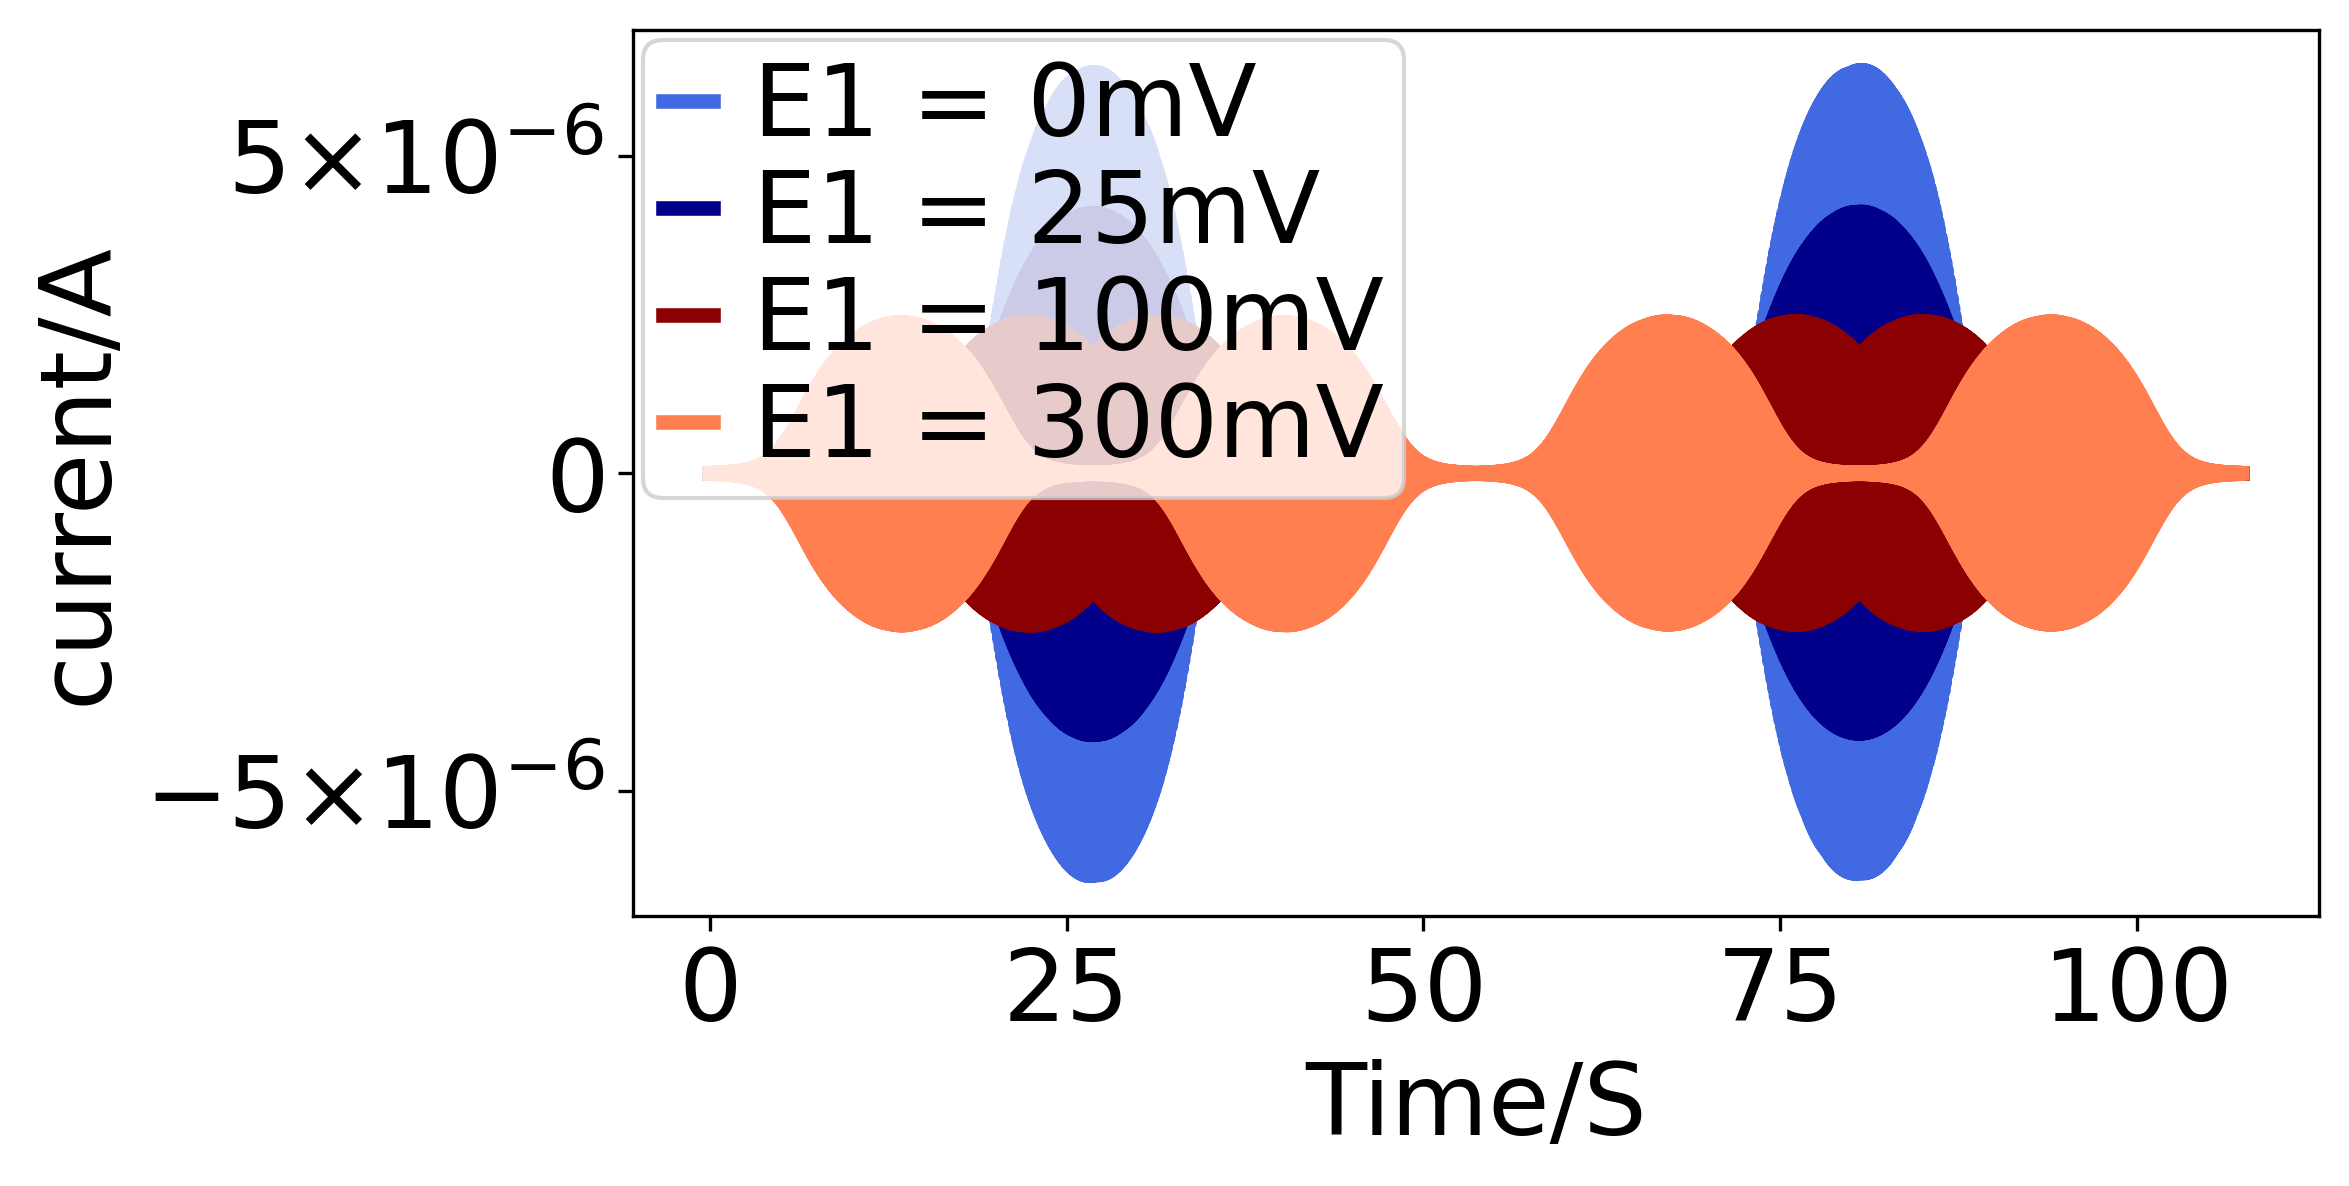

index_window 48.31864296658628
math.ceil(index_window) 49
IFFT_time.shape (98,)
sim_harmonic.shape (98,)
sim_harmonic.shape (98,)
sim_harmonic.shape (98,)
sim_harmonic.shape (98,)


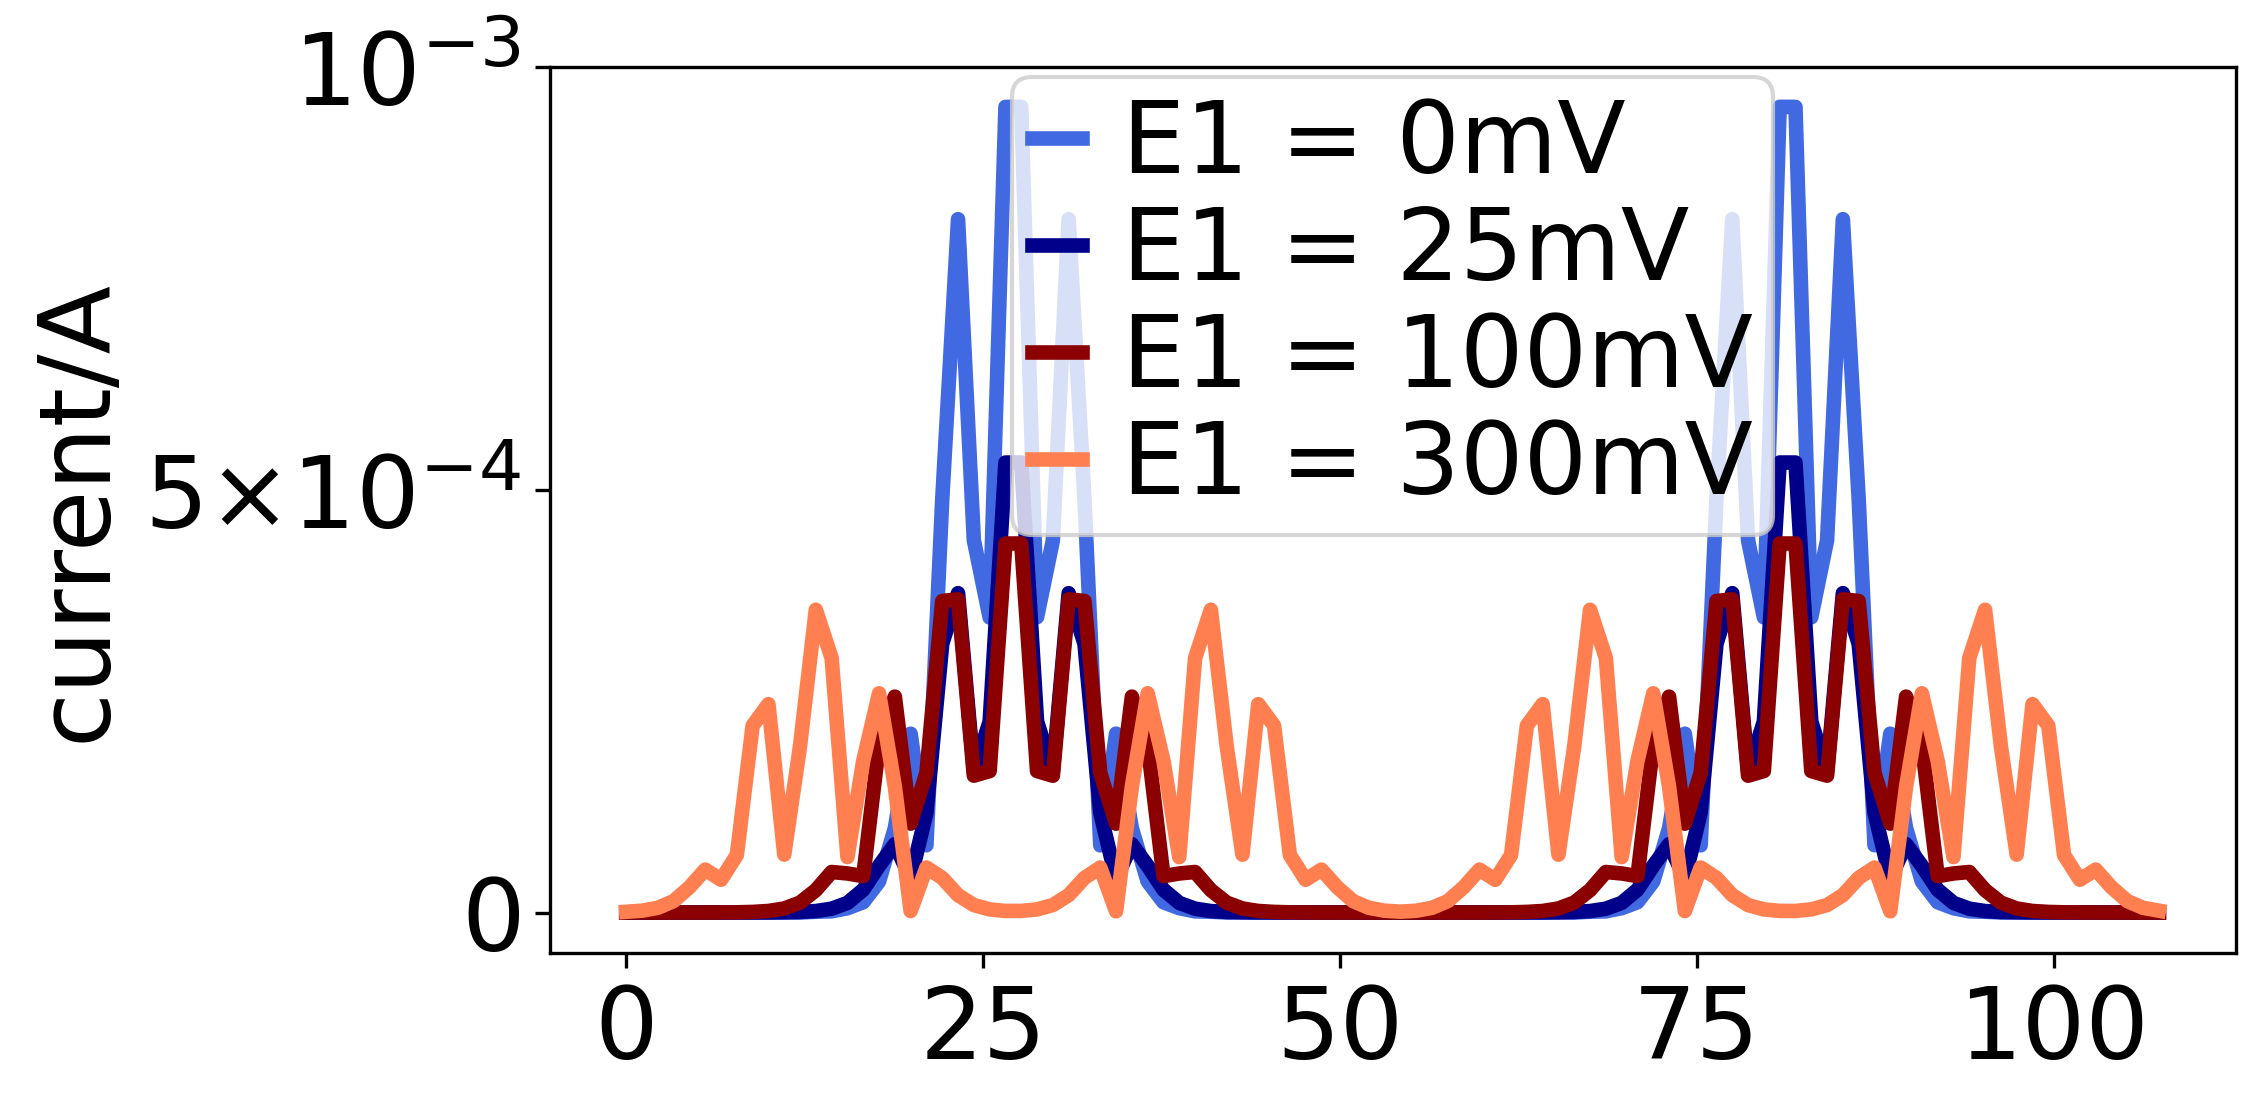

index_window 48.31864296658628
math.ceil(index_window) 49
IFFT_time.shape (98,)
sim_harmonic.shape (98,)
sim_harmonic.shape (98,)
sim_harmonic.shape (98,)
sim_harmonic.shape (98,)


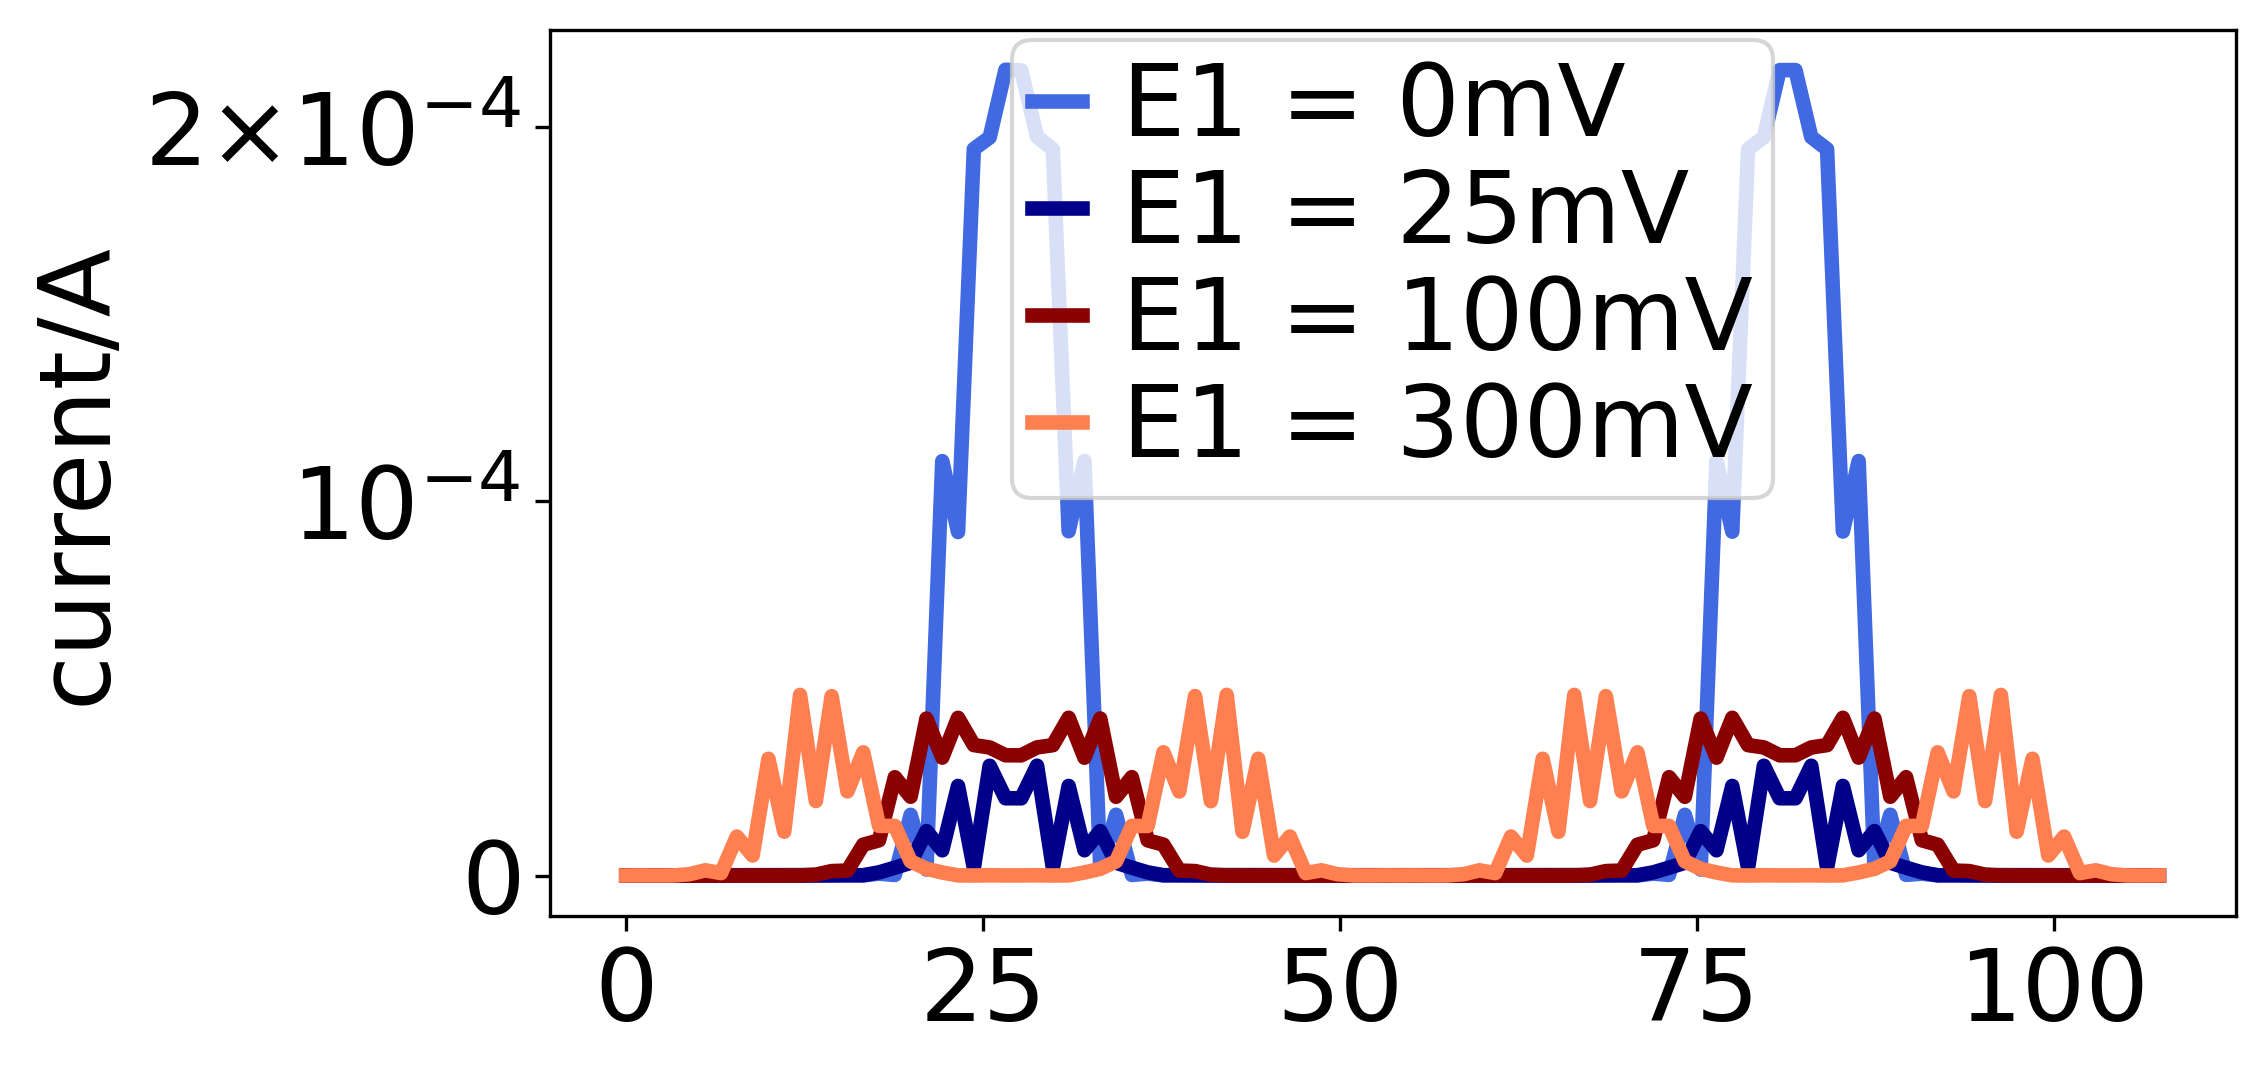

In [5]:
save_here = os.path.join(folder, 'two_step_model')
save_here = os.path.join(save_here, 'E1>E2')

plt.figure()
# plt.title("simulated DC current with E1 > E2 and E1 = -E2")
# plt.ylabel('current/'+r'$\mu$'+'A')
plt.ylabel('current/A')
# plt.xlabel('E/mV')
plt.xlabel('Time/S')
 
for index in range(4):

    temp = model.get_non_dimensionality_constants()

    I0 = temp[2]

    solution = model.simulate(two_step_faradaic_params[index][:], times)

    # plt.figure()
    # plt.title("simulated AC current")
    # plt.ylabel("current/A")
    # plt.xlabel('E/V')
    colour = ['royalblue', 'darkblue', 'darkred', 'coral']
    label = ['E1 = 0mV', 'E1 = 25mV', 'E1 = 100mV', 'E1 = 300mV']
    output = np.vstack((output, solution*I0))
    headers.append(label[index])
    plt.plot(times, solution*I0, str(colour[index]), label=str(label[index]))
    # f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
    # g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    # plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
    # plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
    # plt.show()
    # plt.close()

f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
plt.savefig(os.path.join(save_here,'current_trace.png'),transparent=True, bbox_inches='tight')
plt.show()
plt.close()

output = np.transpose(output)
pd.DataFrame(output).to_csv(os.path.join(save_here,'current_trace.txt'), header=headers, index=None, sep='\t')
del(output)

for harmonic in (5, 10):

    # temp = model.get_non_dimensionality_constants()

    # I0 = temp[2]


    index_window = model.index_distance_covering(Hz_interval, times)
    print('index_window', index_window)
    print('math.ceil(index_window)', math.ceil(index_window))
    index_window =  math.ceil(index_window)

    for_calc = int(2*index_window)

    startT = 0.0#specify in seconds
    revT =  abs((revPotential - startPotential)/(rateOfPotentialChange))#specify in seconds
    endT = revT*2.0
    first_half_times = np.linspace(startT, revT, for_calc)
    last_half_times = np.linspace(revT, endT, for_calc)
    IFFT_time = np.hstack((first_half_times, last_half_times[1:]))
    IFFT_time = IFFT_time[::2]
    print('IFFT_time.shape', IFFT_time.shape)


    # electode potential variables for epsilon
    potentialRange = np.linspace(startPotential, revPotential, for_calc)
    reversed_potentialRange = np.flip(potentialRange)
    IFFT_fullPotentialRange = np.hstack((potentialRange, reversed_potentialRange[1:]))
    IFFT_fullPotentialRange = IFFT_fullPotentialRange[::2]
    
    output = np.vstack((IFFT_time, IFFT_fullPotentialRange))
    headers = ['time/s', 'potential/V']

    plt.figure()
    # plt.title("absolute harmonic "+str(harmonic) + " E1 > E2 and E1 = -E2")
    # plt.ylabel("Current/Dimensionless")
    # plt.ylabel('current/'+r'$\mu$'+'A')
    plt.ylabel('current/A')

    for index in range(4):

        solution = model.simulate(two_step_faradaic_params[index][:], times)

        # non dimesnisionles before FT when graphing!

        solution = solution*I0

        harmonics_from_4 = model.FT_and_reduce_to_harmonics_4_to_12(solution)
        freq4_12 = model.frequencies_for_harmonics_4_to_12(times)

        sp = np.fft.fft(solution)
        sp = sp[:int(numberOfMeasurements/4)]
        # sp = sp*2

        freq_org = np.fft.fftfreq(times.shape[0], d= model.timeStepSize)
        freq_org=freq_org[:int(numberOfMeasurements/4)]

        x = np.where(freq_org < (freq*harmonic))
        mid_point_index = x[0][-1] +1
        
        mid = int(mid_point_index)
        low = int(mid_point_index - index_window)
        high = int(mid_point_index+ index_window)

        for i in range(4,13):
            x = np.where(freq_org < (freq*i))

            mid_point_index = x[0][-1] +1
            lower = int(mid_point_index - index_window)
            upper = int(mid_point_index+ index_window)
            mid_point_plot = int(mid_point_index)

            plt.figure()
            plt.title("simulated AC current")
            plt.ylabel("current/A")
            plt.xlabel('E/V')
            colour = ['royalblue', 'darkorange', 'k', 'green', 'm']
            label = ['E1 = 0mV', 'E1 = 25mV', 'E1 = 100mV', 'E1 = 300mV']
            plt.plot(freq_org, np.log10(sp), 'r', label='harmonics4-12')
            plt.plot(freq4_12, np.log10(harmonics_from_4), 'k', label='harmonics4-12')
            plt.plot(freq_org[lower:upper], np.log10(sp[lower:upper]), 'b', label='harmonics1')
            f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
            g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
            plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
            plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
            plt.show()
            plt.close()

            plt.figure()
            plt.title("simulated AC current")
            plt.ylabel("current/A")
            plt.xlabel('E/V')
            colour = ['royalblue', 'darkorange', 'k', 'green', 'm']
            label = ['E1 = 0mV', 'E1 = 25mV', 'E1 = 100mV', 'E1 = 300mV']
            plt.plot(freq_org[lower:upper], np.log10(sp[lower:upper]), 'b', label='harmonics '+ str(i))
            plt.plot(freq_org[mid_point_plot], np.log10(sp[mid_point_plot]), 'kX', label='harmonics '+ str(i))
            f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
            g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
            plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
            plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
            plt.show()
            plt.close()

        # inverse FFT

        sim_plot = sp[low:high]

        temp = 300
        mid_upper_sim_plot = sp[mid:high]
        mid_upper_sim_plot = np.hstack((mid_upper_sim_plot, np.zeros(temp)))
        lower_sim_plot = sp[low:mid]
        lower_sim_plot = np.hstack((np.zeros(temp), lower_sim_plot))
                
        array_for_iFFT = np.hstack((mid_upper_sim_plot, lower_sim_plot))
        sim_harmonic = np.fft.ifft(array_for_iFFT)
        sim_harmonic = sim_harmonic

        print('sim_harmonic.shape', sim_harmonic.shape)

        colour = ['royalblue', 'darkblue', 'darkred', 'coral']
        label = ['E1 = 0mV', 'E1 = 25mV', 'E1 = 100mV', 'E1 = 300mV']

        # plt.plot(sim_harmonic.real, str(colour[index]), label='Real harmonic '+ str(harmonic) + ' '+str(label[index]))
        # plt.plot(sim_harmonic.imag, str(colour[index]), linestyle='dashed', label='Imaginary harmonic '+ str(harmonic) +' '+str(label[index]))
        plt.plot(IFFT_time, np.absolute(sim_harmonic),str(colour[index]), label=str(label[index]))

        output = np.vstack((output, np.absolute(sim_harmonic)))
        headers.append(label[index])
    
    # plt.tick_params(
    #                 axis='x',          # changes apply to the x-axis
    #                 which='both',      # both major and minor ticks are affected
    #                 bottom=False,      # ticks along the bottom edge are off
    #                 top=False,         # ticks along the top edge are off
    #                 labelbottom=False)

    f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
    plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
    plt.savefig(os.path.join(save_here,'harmonic_' + str(harmonic) + '.png'),transparent=True, bbox_inches='tight')
    plt.show()
    plt.close()

    output = np.transpose(output)
    pd.DataFrame(output).to_csv(os.path.join(save_here,'harmonic_' + str(harmonic) + '.txt'), header=headers, index=None, sep='\t')
    del(output)

In [6]:
startPotential = 200.5E-3
revPotential = -200.5E-3

numberOfMeasurements = 31333

Hz_interval = freq*0.5# freq*0.05

# times for simulation

startT = 0.0#specify in seconds
revT =  abs((revPotential - startPotential)/(rateOfPotentialChange))#specify in seconds
endT = revT*2.0
first_half_times = np.linspace(startT, revT, numberOfMeasurements)
last_half_times = np.linspace(revT, endT, numberOfMeasurements)
times = np.hstack((first_half_times, last_half_times[1:]))


# electode potential variables for epsilon
potentialRange = np.linspace(startPotential, revPotential, numberOfMeasurements)
reversed_potentialRange = np.flip(potentialRange)
fullPotentialRange = np.hstack((potentialRange, reversed_potentialRange[1:]))

trial = newtonRaphsonFT(timeStepSize=times[1], inital_current=inital_current, freq=freq, startPotential= startPotential,
                        revPotential = revPotential,rateOfPotentialChange = rateOfPotentialChange, numberOfMeasurements = (numberOfMeasurements*2-1), 
                        deltaepislon=deltaepislon,uncomp_resis=uncomp_resis, electrode_area=electrode_area, electode_coverage=electode_coverage)

model = wrappedNewton(times = times, inital_current=inital_current, freq=freq, startPotential= startPotential,
                     revPotential = revPotential, rateOfPotentialChange = rateOfPotentialChange, deltaepislon=deltaepislon,
                    uncomp_resis=uncomp_resis, electrode_area=electrode_area, electode_coverage=electode_coverage,
                    initaldiscard = 0.0330, enddiscard = 0.885, cap_params=cap_params)

output = np.vstack((times, fullPotentialRange))
headers = ['time/s', 'potential/V']

two_step_faradaic_params =  np.asarray([

                            [k1,  k2,
                            0.0, 0.0,
                            eta,  Zeta],

                            [k1,  k2,
                             -50.0e-03, 50.0e-03,
                            eta,  Zeta],

                            [k1,  k2,
                             -150.0e-03, 150.0e-03,
                            eta,  Zeta],

                            [k1,  k2,
                             -200.0e-03, 200.0e-03,
                            eta,  Zeta],

                             [k1,  k2,
                             -300.0e-03, 300.0e-03,
                            eta,  Zeta]

                            ])

save_here = os.path.join(folder, 'two_step_model')
save_here = os.path.join(save_here, 'E1<E2')

plt.figure()
# plt.title("simulated DC current with E1 > E2 and E1 = -E2")
# plt.ylabel('current/'+r'$\mu$'+'A')
plt.ylabel('current/A')
# plt.xlabel('E/mV')
plt.xlabel('Time/S')
 
for index in range(5):

    solution = model.simulate(two_step_faradaic_params[index][:], times)

    # plt.figure()
    # plt.title("simulated AC current")
    # plt.ylabel("current/A")
    # plt.xlabel('E/V')
    # colour = ['royalblue', 'darkorange', 'k', 'green', 'm']
    colour =['royalblue', 'darkblue', 'rebeccapurple', 'darkred', 'coral']
    label = ['E1 = 0mV','E1 = -50mV', 'E1 = -150mV', 'E1 = -200mV', 'E1 = -300mV']
    output = np.vstack((output, (solution*trial.I0))
    headers.append(label[index])
    plt.plot(times, solution*trial.I0, str(colour[index]), label=str(label[index]))
    # f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
    # g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    # plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
    # plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
    # plt.show()
    # plt.close()

f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
plt.savefig(os.path.join(save_here,'current_trace.png'),transparent=True, bbox_inches='tight')
plt.show()
plt.close()

output = np.transpose(output)
pd.DataFrame(output).to_csv(os.path.join(save_here,'current_trace.txt'), header=headers, index=None, sep='\t')
del(output)

for harmonic in (5, 10):

    temp = model.get_non_dimensionality_constants()

    I0 = temp[2]
    
    index_window = model.index_distance_covering(Hz_interval, times)
    print('index_window', index_window)
    print('math.ceil(index_window)', math.ceil(index_window))
    index_window =  math.ceil(index_window)

    for_calc = int(2*index_window+600)

    startT = 0.0#specify in seconds
    revT =  abs((revPotential - startPotential)/(rateOfPotentialChange))#specify in seconds
    endT = revT*2.0
    first_half_times = np.linspace(startT, revT, for_calc)
    last_half_times = np.linspace(revT, endT, for_calc)
    IFFT_time = np.hstack((first_half_times, last_half_times[1:]))
    IFFT_time = IFFT_time[::2]
    print('IFFT_time.shape', IFFT_time.shape)


    # electode potential variables for epsilon
    potentialRange = np.linspace(startPotential, revPotential, for_calc)
    reversed_potentialRange = np.flip(potentialRange)
    IFFT_fullPotentialRange = np.hstack((potentialRange, reversed_potentialRange[1:]))
    IFFT_fullPotentialRange = IFFT_fullPotentialRange[::2]
    
    output = np.vstack((IFFT_time, IFFT_fullPotentialRange))
    headers = ['time/s', 'potential/V']

    plt.figure()
    # plt.title("absolute harmonic "+str(harmonic) + " E1 > E2 and E1 = -E2")
    # plt.ylabel("Current/Dimensionless")
    # plt.ylabel('current/'+r'$\mu$'+'A')
    plt.ylabel('current/A')

    for index in range(5):

        solution = model.simulate(two_step_faradaic_params[index][:], times)

        # non dimesnisionles before FT when graphing!

        solution = solution*I0

        harmonics_from_4 = model.FT_and_reduce_to_harmonics_4_to_12(solution)
        freq4_12 = model.frequencies_for_harmonics_4_to_12(times)

        sp = np.fft.fft(solution)
        sp = sp[:int(numberOfMeasurements/4)]

        freq_org = np.fft.fftfreq(times.shape[0], d= model.timeStepSize)
        freq_org=freq_org[:int(numberOfMeasurements/4)]

        x = np.where(freq_org < (freq*harmonic))
        mid_point_index = x[0][-1] +1
        
        mid = int(mid_point_index)
        low = int(mid_point_index - index_window)
        high = int(mid_point_index+ index_window)

        # for i in range(4,13):
        #     x = np.where(freq_org < (freq*i))

        #     mid_point_index = x[0][-1] +1
        #     lower = int(mid_point_index - index_window)
        #     upper = int(mid_point_index+ index_window)
        #     mid_point_plot = int(mid_point_index)

        #     plt.figure()
        #     plt.title("simulated AC current")
        #     plt.ylabel("current/A")
        #     plt.xlabel('E/V')
        #     colour = ['royalblue', 'darkorange', 'k', 'green', 'm']
        #     label = ['E1 = 0mV', 'E1 = 25mV', 'E1 = 100mV', 'E1 = 300mV']
        #     plt.plot(freq_org, np.log10(sp), 'r', label='harmonics4-12')
        #     plt.plot(freq4_12, np.log10(harmonics_from_4), 'k', label='harmonics4-12')
        #     plt.plot(freq_org[lower:upper], np.log10(sp[lower:upper]), 'b', label='harmonics1')
        #     f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
        #     g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
        #     plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
        #     plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
        #     plt.show()
        #     plt.close()

        #     plt.figure()
        #     plt.title("simulated AC current")
        #     plt.ylabel("current/A")
        #     plt.xlabel('E/V')
        #     colour = ['royalblue', 'darkorange', 'k', 'green', 'm']
        #     label = ['E1 = 0mV', 'E1 = 25mV', 'E1 = 100mV', 'E1 = 300mV']
        #     plt.plot(freq_org[lower:upper], np.log10(sp[lower:upper]), 'b', label='harmonics '+ str(i))
        #     plt.plot(freq_org[mid_point_plot], np.log10(sp[mid_point_plot]), 'kX', label='harmonics '+ str(i))
        #     f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
        #     g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
        #     plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
        #     plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
        #     plt.show()
        #     plt.close()

        # inverse FFT

        sim_plot = sp[low:high]

        temp =  300 #sim_plot.shape[0]*6 # 300
        mid_upper_sim_plot = sp[mid:high]
        mid_upper_sim_plot = np.hstack((mid_upper_sim_plot, np.zeros(temp)))
        lower_sim_plot = sp[low:mid]
        lower_sim_plot = np.hstack((np.zeros(temp), lower_sim_plot))
                
        array_for_iFFT = np.hstack((mid_upper_sim_plot, lower_sim_plot))
        sim_harmonic = np.fft.ifft(array_for_iFFT)
        sim_harmonic = sim_harmonic

        print('sim_harmonic.shape', sim_harmonic.shape)

        colour =['royalblue', 'darkblue', 'rebeccapurple', 'darkred', 'coral']
        label = ['E1 = 0mV','E1 = -50mV', 'E1 = -150mV', 'E1 = -200mV', 'E1 = -300mV']

        # plt.plot(sim_harmonic.real, str(colour[index]), label='Real harmonic '+ str(harmonic) + ' '+str(label[index]))
        # plt.plot(sim_harmonic.imag, str(colour[index]), linestyle='dashed', label='Imaginary harmonic '+ str(harmonic) +' '+str(label[index]))
        plt.plot(IFFT_time, np.absolute(sim_harmonic),str(colour[index]), label=str(label[index]))

        output = np.vstack((output, np.absolute(sim_harmonic)))
        headers.append(label[index])
    
    # plt.tick_params(
    #                 axis='x',          # changes apply to the x-axis
    #                 which='both',      # both major and minor ticks are affected
    #                 bottom=False,      # ticks along the bottom edge are off
    #                 top=False,         # ticks along the top edge are off
    #                 labelbottom=False)

    f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
    plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
    plt.savefig(os.path.join(save_here,'harmonic_' + str(harmonic) + '.png'),transparent=True, bbox_inches='tight')
    plt.show()
    plt.close()

    output = np.transpose(output)
    pd.DataFrame(output).to_csv(os.path.join(save_here,'harmonic_' + str(harmonic) + '.txt'), header=headers, index=None, sep='\t')
    del(output)

SyntaxError: invalid syntax (<ipython-input-6-f39b81e8e3d5>, line 81)

In [7]:
startPotential = 600.0E-3
revPotential = -300.0E-3

numberOfMeasurements = 68550

# times for simulation

startT = 0.0#specify in seconds
revT =  abs((revPotential - startPotential)/(rateOfPotentialChange))#specify in seconds
endT = revT*2.0
first_half_times = np.linspace(startT, revT, numberOfMeasurements)
last_half_times = np.linspace(revT, endT, numberOfMeasurements)
times = np.hstack((first_half_times, last_half_times[1:]))


# electode potential variables for epsilon
potentialRange = np.linspace(startPotential, revPotential, numberOfMeasurements)
reversed_potentialRange = np.flip(potentialRange)
fullPotentialRange = np.hstack((potentialRange, reversed_potentialRange[1:]))

# single step model

trial = oneStepModel(timeStepSize=times[1], inital_current=inital_current, freq=freq, startPotential= startPotential,
                        revPotential = revPotential,rateOfPotentialChange = rateOfPotentialChange, numberOfMeasurements = (numberOfMeasurements*2-1), 
                        deltaepislon=deltaepislon,uncomp_resis=uncomp_resis, electrode_area=electrode_area, electode_coverage=electode_coverage)

model = wrappedOneStepModel(times = times, inital_current=inital_current, freq=freq, startPotential= startPotential,
                     revPotential = revPotential, rateOfPotentialChange = rateOfPotentialChange, deltaepislon=deltaepislon,
                    uncomp_resis=uncomp_resis, electrode_area=electrode_area, electode_coverage=electode_coverage,
                    initaldiscard = 0.01, enddiscard = 0.885, cap_params=cap_params)

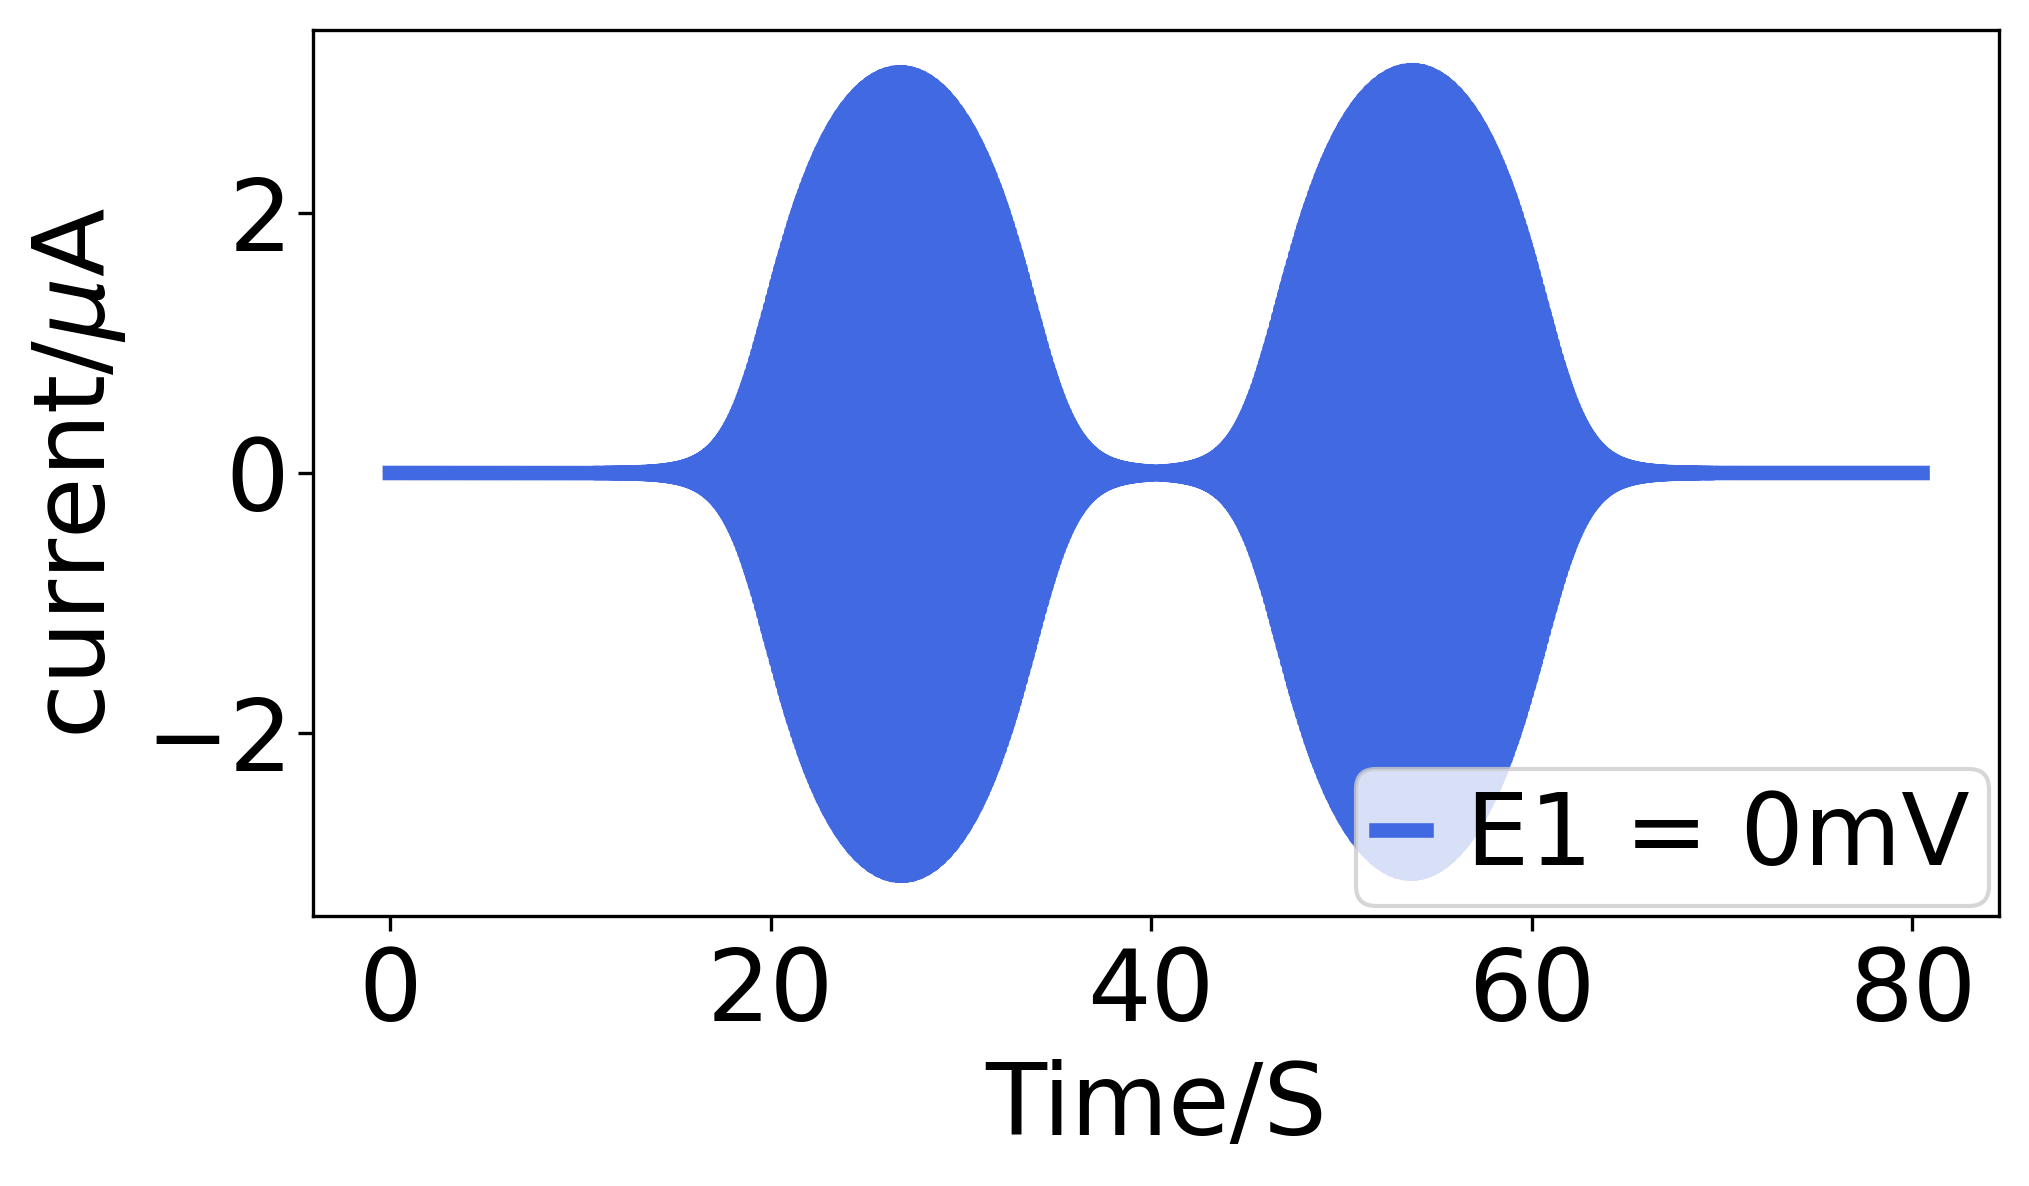

index_window 362.39053791000975
math.ceil(index_window) 363
IFFT_time.shape (1325,)
sim_harmonic.shape (1325,)
sim_harmonic.shape (1325,)
sim_harmonic.shape (1325,)
sim_harmonic.shape (1325,)


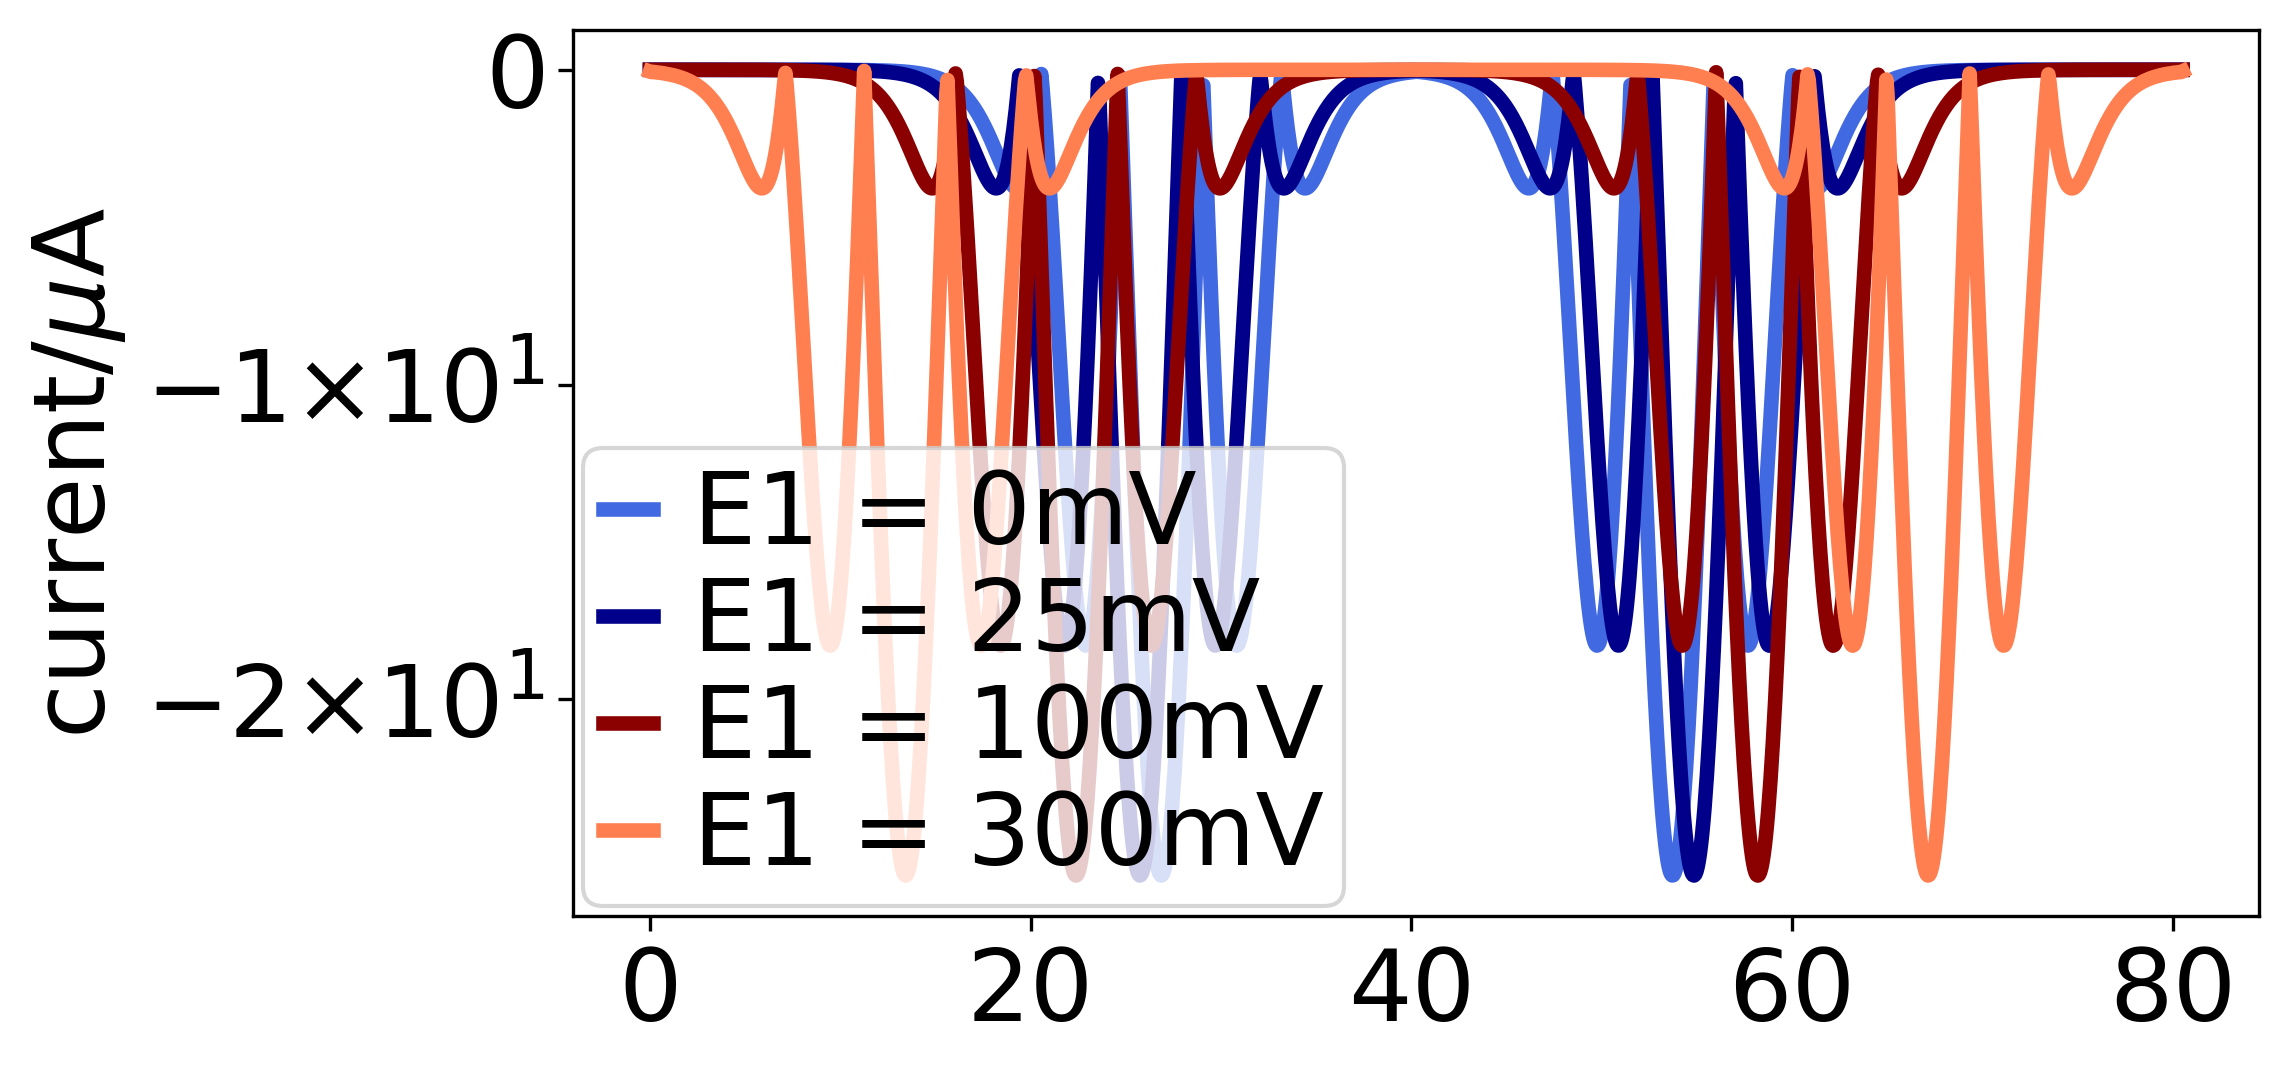

index_window 362.39053791000975
math.ceil(index_window) 363
IFFT_time.shape (1325,)
sim_harmonic.shape (1325,)
sim_harmonic.shape (1325,)
sim_harmonic.shape (1325,)
sim_harmonic.shape (1325,)


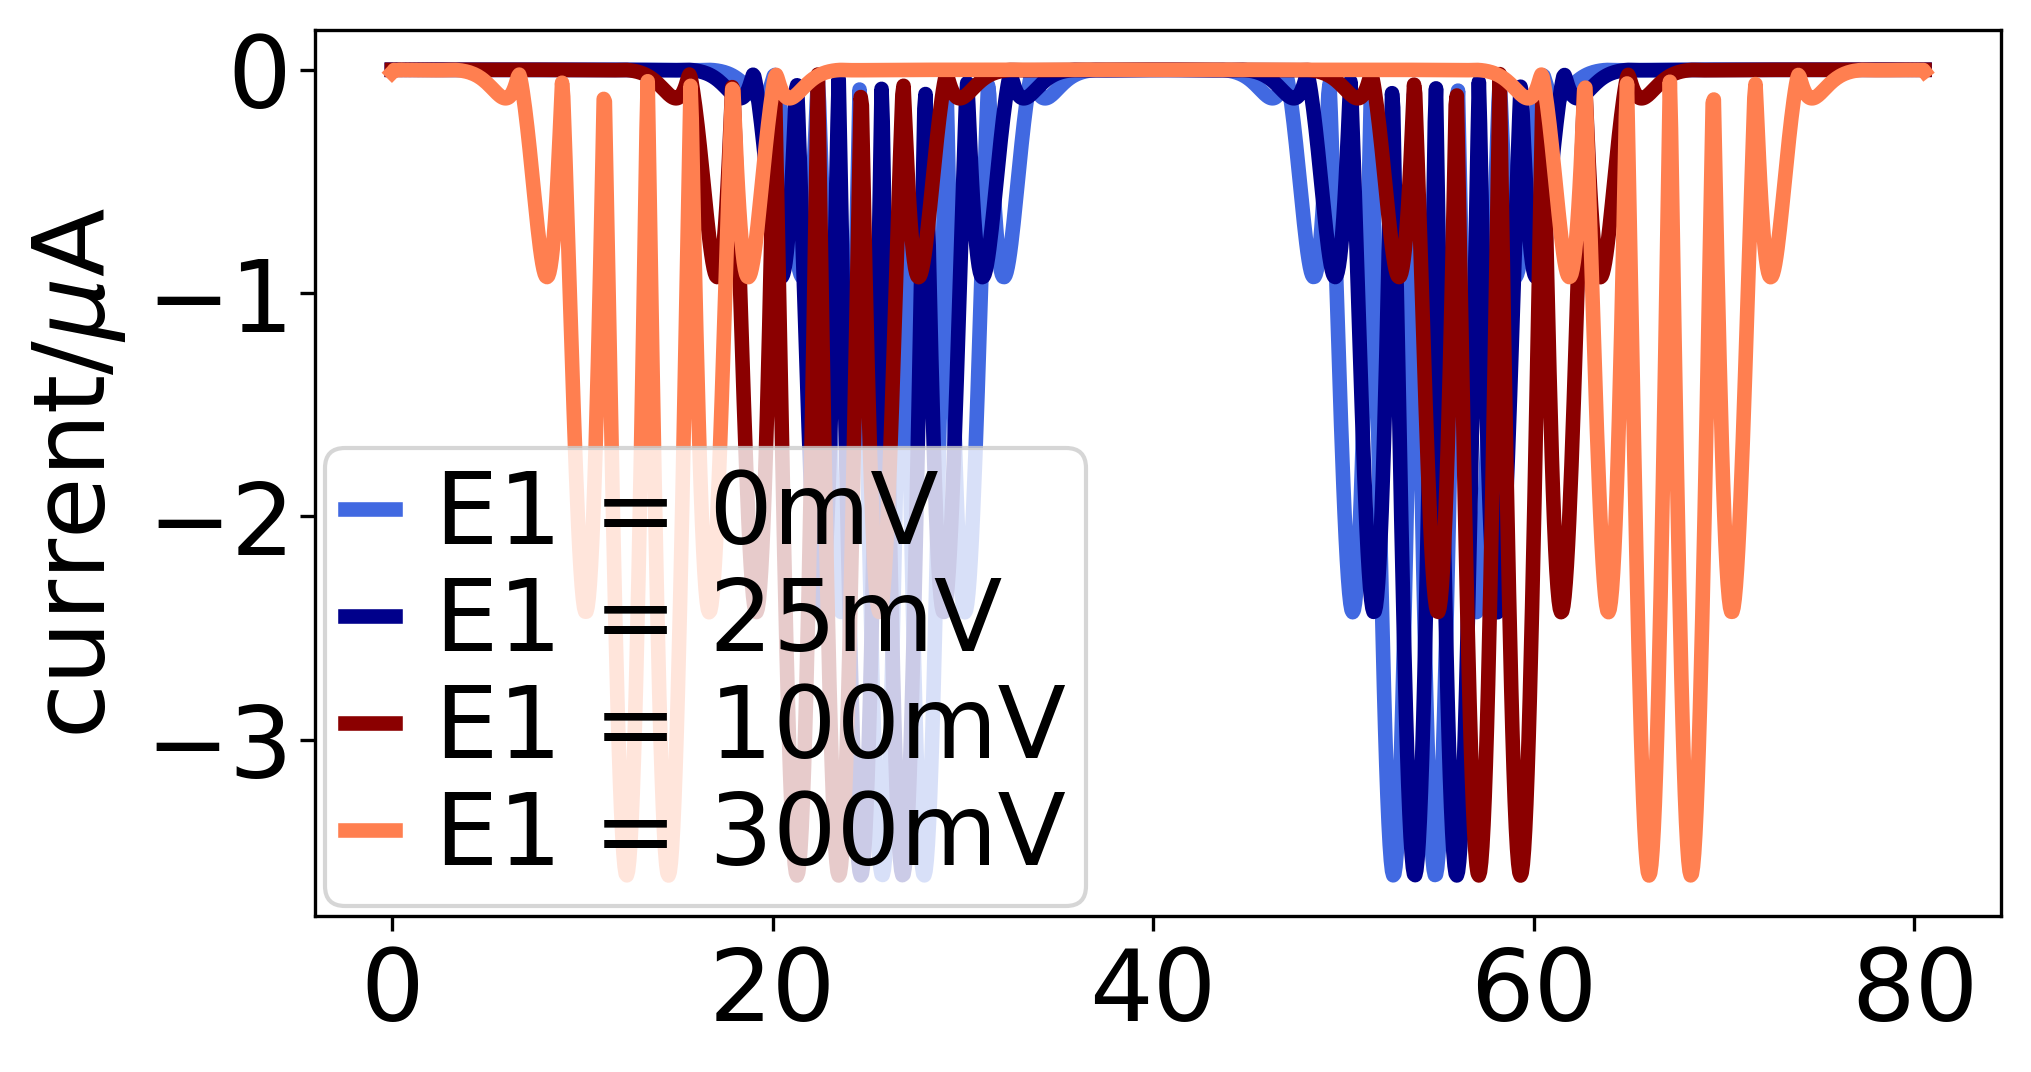

In [8]:
save_here = os.path.join(folder, 'one_step_model')
save_here = os.path.join(save_here, 'positive_E')

plt.figure()
# plt.title("simulated DC current negative E")
plt.ylabel('current/'+r'$\mu$'+'A')
# plt.xlabel('E/mV')
plt.xlabel('Time/S')

one_step_faradaic_params =  np.asarray([[k1,
                            0.0e-03,
                            eta,  Zeta],

                            [k1,
                             25.0e-03,
                            eta,  Zeta],

                            [k1,
                             100.0e-03,
                            eta,  Zeta],

                            [k1,
                             300.0e-03,
                            eta,  Zeta]
                            ])

output = np.vstack((times, fullPotentialRange))
headers = ['time/s', 'potential/V']

for index in range(1):

    solution = model.simulate(one_step_faradaic_params[index][:], times)

    # plt.figure()
    # plt.title("simulated AC current")
    # plt.ylabel("current/A")
    # plt.xlabel('E/V')
    colour = ['royalblue', 'darkblue', 'darkred', 'coral']
    label = ['E1 = 0mV', 'E1 = 25mV', 'E1 = 100mV', 'E1 = 300mV']
    output = np.vstack((output, (10**6)*solution*trial.I0))
    headers.append(label[index])
    plt.plot(times, (10**6)*solution*trial.I0, str(colour[index]), label=str(label[index]))
    # f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
    # g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    # plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
    # plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
    # plt.show()
    # plt.close()

f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
plt.savefig(os.path.join(save_here,'current_trace.png'),transparent=True, bbox_inches='tight')
plt.show()
plt.close()

output = np.transpose(output)
pd.DataFrame(output).to_csv(os.path.join(save_here,'current_trace.txt'), header=headers, index=None, sep='\t')
del(output)

for harmonic in (5, 10):

    temp = model.get_non_dimensionality_constants()

    I0 = temp[2]

    index_window = model.index_distance_covering(Hz_interval, times)
    print('index_window', index_window)
    print('math.ceil(index_window)', math.ceil(index_window))
    index_window =  math.ceil(index_window)

    for_calc = int(index_window+300)

    startT = 0.0#specify in seconds
    revT =  abs((revPotential - startPotential)/(rateOfPotentialChange))#specify in seconds
    endT = revT*2.0
    first_half_times = np.linspace(startT, revT, for_calc)
    last_half_times = np.linspace(revT, endT, for_calc)
    IFFT_time = np.hstack((first_half_times, last_half_times[1:]))
    #IFFT_time = IFFT_time[::2]
    print('IFFT_time.shape', IFFT_time.shape)


    # electode potential variables for epsilon
    potentialRange = np.linspace(startPotential, revPotential, for_calc)
    reversed_potentialRange = np.flip(potentialRange)
    IFFT_fullPotentialRange = np.hstack((potentialRange, reversed_potentialRange[1:]))
    #IFFT_fullPotentialRange = IFFT_fullPotentialRange[::2]
    
    output = np.vstack((IFFT_time, IFFT_fullPotentialRange))
    headers = ['time/s', 'potential/V']

    plt.figure()
    # plt.title("absolute harmonic "+str(harmonic) + " E1 > E2 and E1 = -E2")
    # plt.ylabel("Current/Dimensionless")
    plt.ylabel('current/'+r'$\mu$'+'A')

    for index in range(4):

        solution = model.simulate(two_step_faradaic_params[index][:], times)

        # non dimesnisionles before FT when graphing!

        solution = solution*I0

        harmonics_from_4 = model.FT_and_reduce_to_harmonics_4_to_12(solution)
        freq4_12 = model.frequencies_for_harmonics_4_to_12(times)

        sp = np.fft.fft(solution)
        sp = sp[:int(numberOfMeasurements/4)]

        freq_org = np.fft.fftfreq(times.shape[0], d= model.timeStepSize)
        freq_org=freq_org[:int(numberOfMeasurements/4)]

        x = np.where(freq_org < (freq*harmonic))
        mid_point_index = x[0][-1] +1
        
        mid = int(mid_point_index)
        low = int(mid_point_index - index_window)
        high = int(mid_point_index+ index_window)

        # for i in range(4,13):
        #     x = np.where(freq_org < (freq*i))

        #     mid_point_index = x[0][-1] +1
        #     lower = int(mid_point_index - index_window)
        #     upper = int(mid_point_index+ index_window)
        #     mid_point_plot = int(mid_point_index)

        #     plt.figure()
        #     plt.title("simulated AC current")
        #     plt.ylabel("current/A")
        #     plt.xlabel('E/V')
        #     colour = ['royalblue', 'darkorange', 'k', 'green', 'm']
        #     label = ['E1 = 0mV', 'E1 = 25mV', 'E1 = 100mV', 'E1 = 300mV']
        #     plt.plot(freq_org, np.log10(sp), 'r', label='harmonics4-12')
        #     plt.plot(freq4_12, np.log10(harmonics_from_4), 'k', label='harmonics4-12')
        #     plt.plot(freq_org[lower:upper], np.log10(sp[lower:upper]), 'b', label='harmonics1')
        #     f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
        #     g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
        #     plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
        #     plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
        #     plt.show()
        #     plt.close()

        #     plt.figure()
        #     plt.title("simulated AC current")
        #     plt.ylabel("current/A")
        #     plt.xlabel('E/V')
        #     colour = ['royalblue', 'darkorange', 'k', 'green', 'm']
        #     label = ['E1 = 0mV', 'E1 = 25mV', 'E1 = 100mV', 'E1 = 300mV']
        #     plt.plot(freq_org[lower:upper], np.log10(sp[lower:upper]), 'b', label='harmonics '+ str(i))
        #     plt.plot(freq_org[mid_point_plot], np.log10(sp[mid_point_plot]), 'kX', label='harmonics '+ str(i))
        #     f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
        #     g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
        #     plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
        #     plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
        #     plt.show()
        #     plt.close()

        # inverse FFT

        sim_plot = sp[low:high]

        temp =  300 #sim_plot.shape[0]*6 # 300
        mid_upper_sim_plot = sp[mid:high]
        mid_upper_sim_plot = np.hstack((mid_upper_sim_plot, np.zeros(temp)))
        lower_sim_plot = sp[low:mid]
        lower_sim_plot = np.hstack((np.zeros(temp), lower_sim_plot))
                
        array_for_iFFT = np.hstack((mid_upper_sim_plot, lower_sim_plot))
        sim_harmonic = np.fft.ifft(array_for_iFFT)
        sim_harmonic = sim_harmonic

        print('sim_harmonic.shape', sim_harmonic.shape)

        colour = ['royalblue', 'darkblue', 'darkred', 'coral']
        label = ['E1 = 0mV', 'E1 = 25mV', 'E1 = 100mV', 'E1 = 300mV']

        # plt.plot(sim_harmonic.real, str(colour[index]), label='Real harmonic '+ str(harmonic) + ' '+str(label[index]))
        # plt.plot(sim_harmonic.imag, str(colour[index]), linestyle='dashed', label='Imaginary harmonic '+ str(harmonic) +' '+str(label[index]))
        plt.plot(IFFT_time, (np.absolute(sim_harmonic))*(10**6),str(colour[index]), label=str(label[index]))

        output = np.vstack((output, (np.absolute(sim_harmonic))*(10**6)))
        headers.append(label[index])
    
    # plt.tick_params(
    #                 axis='x',          # changes apply to the x-axis
    #                 which='both',      # both major and minor ticks are affected
    #                 bottom=False,      # ticks along the bottom edge are off
    #                 top=False,         # ticks along the top edge are off
    #                 labelbottom=False)

    f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
    plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
    plt.savefig(os.path.join(save_here,'harmonic_' + str(harmonic) + '.png'),transparent=True, bbox_inches='tight')
    plt.show()
    plt.close()

    output = np.transpose(output)
    pd.DataFrame(output).to_csv(os.path.join(save_here,'harmonic_' + str(harmonic) + '.txt'), header=headers, index=None, sep='\t')
    del(output)

In [9]:
startPotential = 300.0E-3
revPotential = -600.0E-3

numberOfMeasurements = 68550

# times for simulation

startT = 0.0#specify in seconds
revT =  abs((revPotential - startPotential)/(rateOfPotentialChange))#specify in seconds
endT = revT*2.0
first_half_times = np.linspace(startT, revT, numberOfMeasurements)
last_half_times = np.linspace(revT, endT, numberOfMeasurements)
times = np.hstack((first_half_times, last_half_times[1:]))


# electode potential variables for epsilon
potentialRange = np.linspace(startPotential, revPotential, numberOfMeasurements)
reversed_potentialRange = np.flip(potentialRange)
fullPotentialRange = np.hstack((potentialRange, reversed_potentialRange[1:]))

# single step model

trial = oneStepModel(timeStepSize=times[1], inital_current=inital_current, freq=freq, startPotential= startPotential,
                        revPotential = revPotential,rateOfPotentialChange = rateOfPotentialChange, numberOfMeasurements = (numberOfMeasurements*2-1), 
                        deltaepislon=deltaepislon,uncomp_resis=uncomp_resis, electrode_area=electrode_area, electode_coverage=electode_coverage)

model = wrappedOneStepModel(times = times, inital_current=inital_current, freq=freq, startPotential= startPotential,
                     revPotential = revPotential, rateOfPotentialChange = rateOfPotentialChange, deltaepislon=deltaepislon,
                    uncomp_resis=uncomp_resis, electrode_area=electrode_area, electode_coverage=electode_coverage,
                    initaldiscard = 0.01, enddiscard = 0.885, cap_params=cap_params)

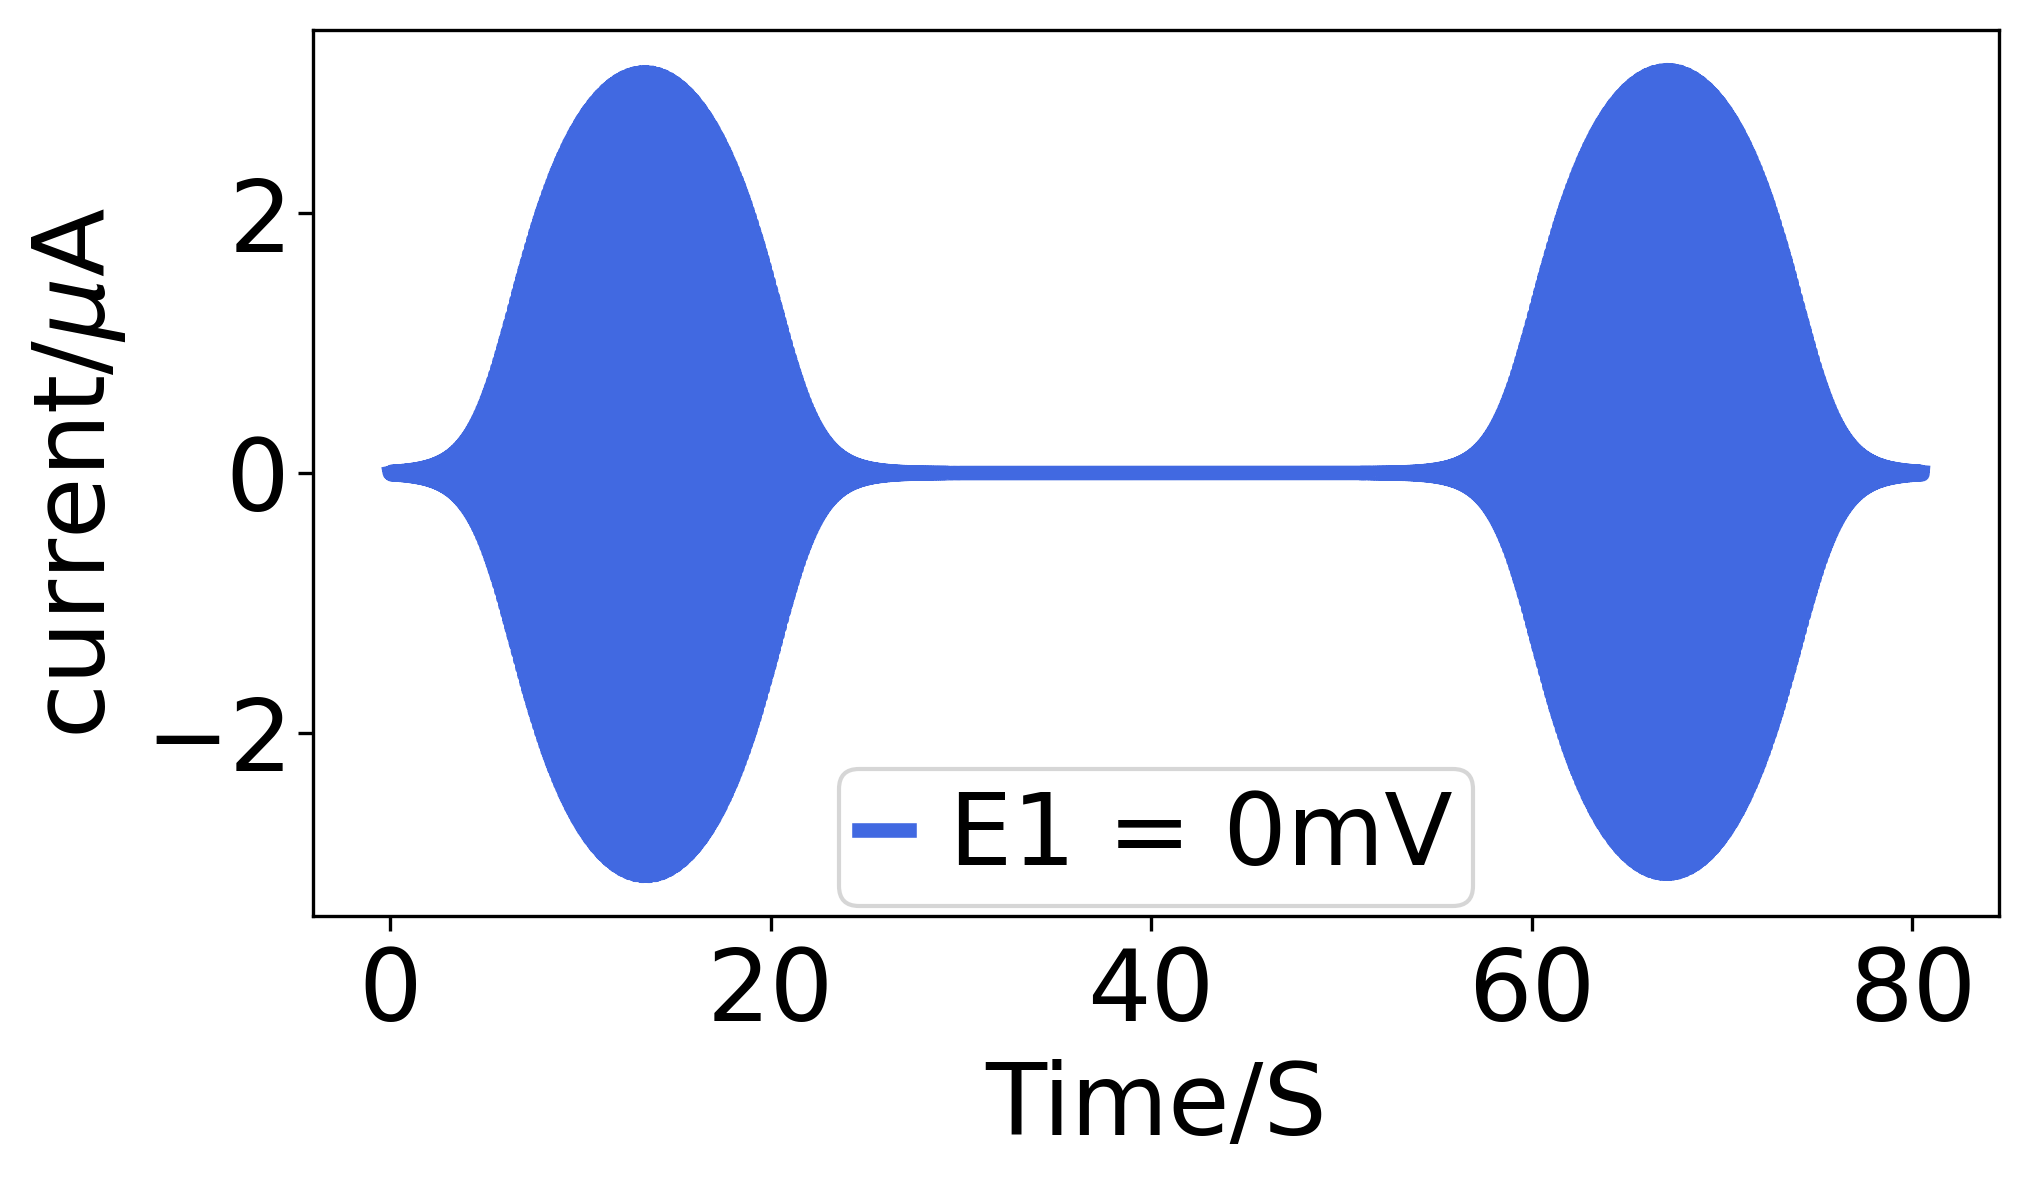

index_window 362.39053791000975
math.ceil(index_window) 363
IFFT_time.shape (1325,)
sim_harmonic.shape (1325,)
sim_harmonic.shape (1325,)
sim_harmonic.shape (1325,)
sim_harmonic.shape (1325,)


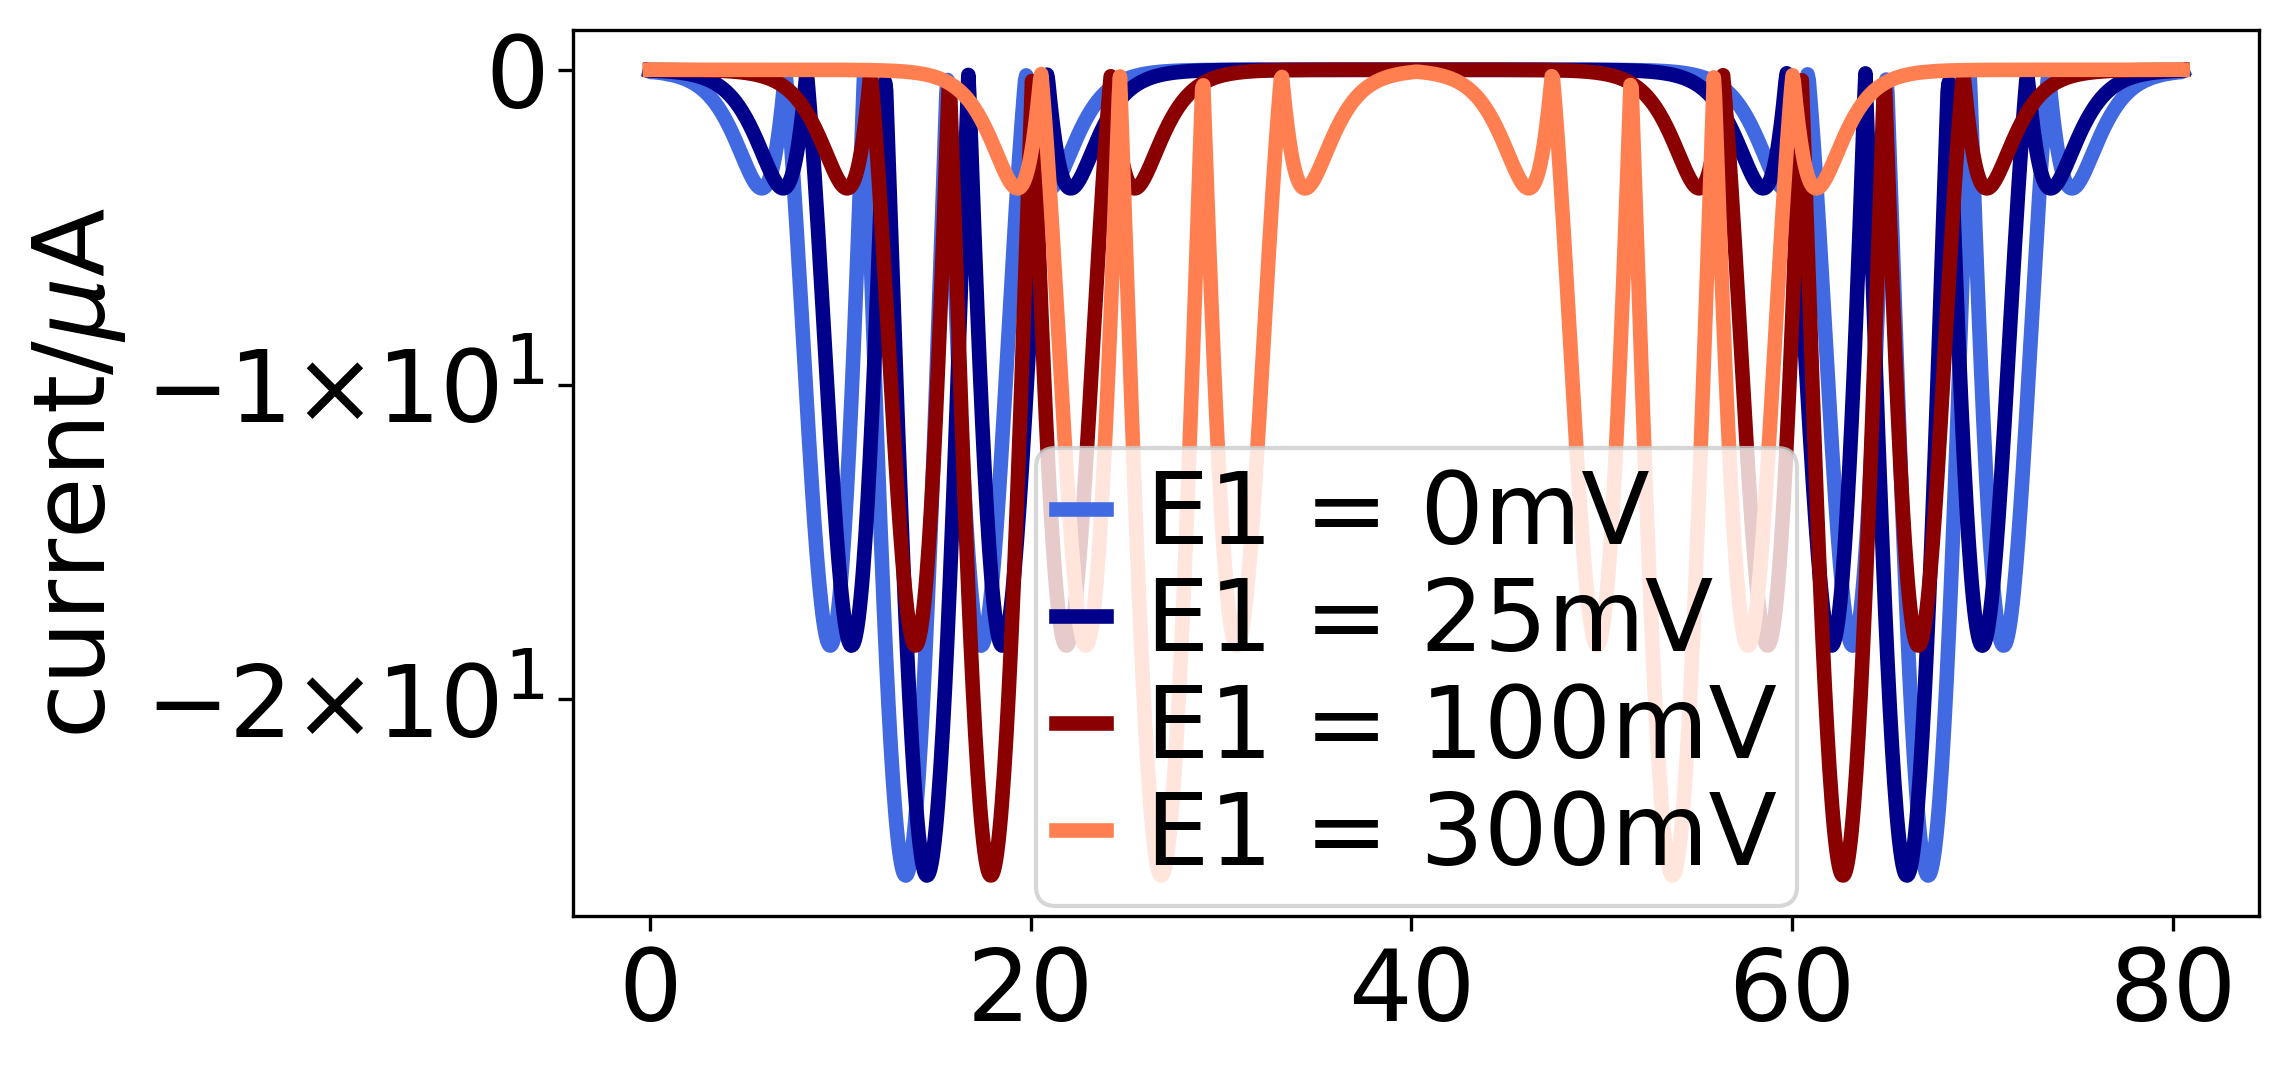

index_window 362.39053791000975
math.ceil(index_window) 363
IFFT_time.shape (1325,)
sim_harmonic.shape (1325,)
sim_harmonic.shape (1325,)
sim_harmonic.shape (1325,)
sim_harmonic.shape (1325,)


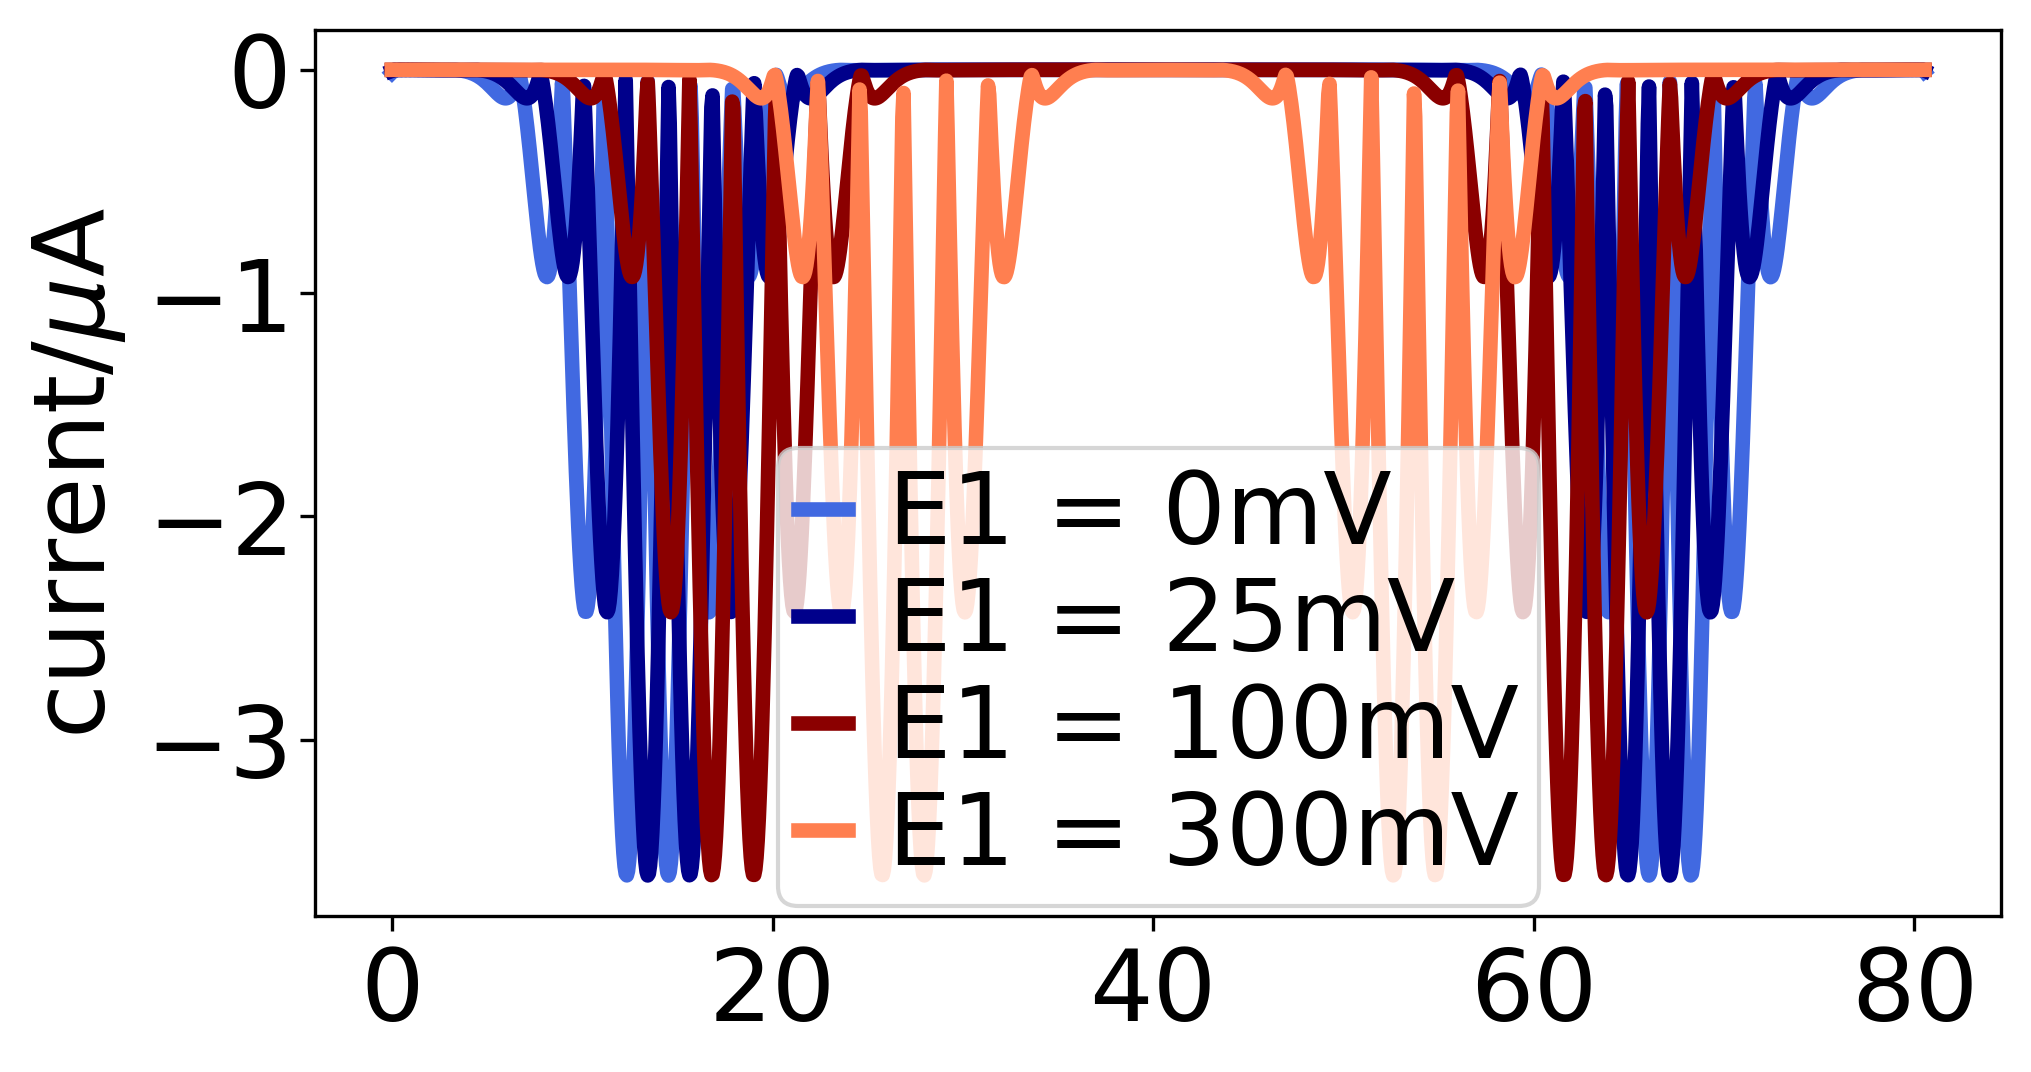

In [10]:
save_here = os.path.join(folder, 'one_step_model')
save_here = os.path.join(save_here, 'negative_E')

plt.figure()
# plt.title("simulated DC current positive E")
plt.ylabel('current/'+r'$\mu$'+'A')
# plt.xlabel('E/mV')
plt.xlabel('Time/S')

one_step_faradaic_params =  np.asarray([[k1,
                            0.0e-03,
                            eta,  Zeta],

                            [k1,
                             -25.0e-03,
                            eta,  Zeta],

                            [k1,
                             -100.0e-03,
                            eta,  Zeta],

                            [k1,
                             -300.0e-03,
                            eta,  Zeta]
                            ])

output = np.vstack((times, fullPotentialRange))
headers = ['time/s', 'potential/V']

for index in range(1):

    solution = model.simulate(one_step_faradaic_params[index][:], times)

    # plt.figure()
    # plt.title("simulated AC current")
    # plt.ylabel("current/A")
    # plt.xlabel('E/V')
    colour = ['royalblue', 'darkblue', 'darkred', 'coral']
    label = ['E1 = 0mV', 'E1 = -25mV', 'E1 = -100mV', 'E1 = -300mV']
    output = np.vstack((output, (10**6)*solution*trial.I0))
    headers.append(label[index])
    plt.plot(times, (10**6)*solution*trial.I0, str(colour[index]), label=str(label[index]))
    # f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
    # g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    # plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
    # plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
    # plt.show()
    # plt.close()

f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
plt.savefig(os.path.join(save_here,'current_trace.png'),transparent=True, bbox_inches='tight')
plt.show()
plt.close()

output = np.transpose(output)
pd.DataFrame(output).to_csv(os.path.join(save_here,'current_trace.txt'), header=headers, index=None, sep='\t')
del(output)

for harmonic in (5, 10):

    temp = model.get_non_dimensionality_constants()

    I0 = temp[2]

    index_window = model.index_distance_covering(Hz_interval, times)
    print('index_window', index_window)
    print('math.ceil(index_window)', math.ceil(index_window))
    index_window =  math.ceil(index_window)

    for_calc = int(index_window+300)

    startT = 0.0#specify in seconds
    revT =  abs((revPotential - startPotential)/(rateOfPotentialChange))#specify in seconds
    endT = revT*2.0
    first_half_times = np.linspace(startT, revT, for_calc)
    last_half_times = np.linspace(revT, endT, for_calc)
    IFFT_time = np.hstack((first_half_times, last_half_times[1:]))
    #IFFT_time = IFFT_time[::2]
    print('IFFT_time.shape', IFFT_time.shape)


    # electode potential variables for epsilon
    potentialRange = np.linspace(startPotential, revPotential, for_calc)
    reversed_potentialRange = np.flip(potentialRange)
    IFFT_fullPotentialRange = np.hstack((potentialRange, reversed_potentialRange[1:]))
    #IFFT_fullPotentialRange = IFFT_fullPotentialRange[::2]
    
    output = np.vstack((IFFT_time, IFFT_fullPotentialRange))
    headers = ['time/s', 'potential/V']

    plt.figure()
    # plt.title("absolute harmonic "+str(harmonic) + " E1 > E2 and E1 = -E2")
    # plt.ylabel("Current/Dimensionless")
    plt.ylabel('current/'+r'$\mu$'+'A')

    for index in range(4):

        solution = model.simulate(two_step_faradaic_params[index][:], times)

        # non dimesnisionles before FT when graphing!

        solution = solution*I0

        harmonics_from_4 = model.FT_and_reduce_to_harmonics_4_to_12(solution)
        freq4_12 = model.frequencies_for_harmonics_4_to_12(times)

        sp = np.fft.fft(solution)
        sp = sp[:int(numberOfMeasurements/4)]

        freq_org = np.fft.fftfreq(times.shape[0], d= model.timeStepSize)
        freq_org=freq_org[:int(numberOfMeasurements/4)]

        x = np.where(freq_org < (freq*harmonic))
        mid_point_index = x[0][-1] +1
        
        mid = int(mid_point_index)
        low = int(mid_point_index - index_window)
        high = int(mid_point_index+ index_window)

        # for i in range(4,13):
        #     x = np.where(freq_org < (freq*i))

        #     mid_point_index = x[0][-1] +1
        #     lower = int(mid_point_index - index_window)
        #     upper = int(mid_point_index+ index_window)
        #     mid_point_plot = int(mid_point_index)

        #     plt.figure()
        #     plt.title("simulated AC current")
        #     plt.ylabel("current/A")
        #     plt.xlabel('E/V')
        #     colour = ['royalblue', 'darkorange', 'k', 'green', 'm']
        #     label = ['E1 = 0mV', 'E1 = 25mV', 'E1 = 100mV', 'E1 = 300mV']
        #     plt.plot(freq_org, np.log10(sp), 'r', label='harmonics4-12')
        #     plt.plot(freq4_12, np.log10(harmonics_from_4), 'k', label='harmonics4-12')
        #     plt.plot(freq_org[lower:upper], np.log10(sp[lower:upper]), 'b', label='harmonics1')
        #     f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
        #     g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
        #     plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
        #     plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
        #     plt.show()
        #     plt.close()

        #     plt.figure()
        #     plt.title("simulated AC current")
        #     plt.ylabel("current/A")
        #     plt.xlabel('E/V')
        #     colour = ['royalblue', 'darkorange', 'k', 'green', 'm']
        #     label = ['E1 = 0mV', 'E1 = 25mV', 'E1 = 100mV', 'E1 = 300mV']
        #     plt.plot(freq_org[lower:upper], np.log10(sp[lower:upper]), 'b', label='harmonics '+ str(i))
        #     plt.plot(freq_org[mid_point_plot], np.log10(sp[mid_point_plot]), 'kX', label='harmonics '+ str(i))
        #     f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
        #     g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
        #     plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
        #     plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
        #     plt.show()
        #     plt.close()

        # inverse FFT

        sim_plot = sp[low:high]

        temp =  300 #sim_plot.shape[0]*6 # 300
        mid_upper_sim_plot = sp[mid:high]
        mid_upper_sim_plot = np.hstack((mid_upper_sim_plot, np.zeros(temp)))
        lower_sim_plot = sp[low:mid]
        lower_sim_plot = np.hstack((np.zeros(temp), lower_sim_plot))
                
        array_for_iFFT = np.hstack((mid_upper_sim_plot, lower_sim_plot))
        sim_harmonic = np.fft.ifft(array_for_iFFT)
        sim_harmonic = sim_harmonic

        print('sim_harmonic.shape', sim_harmonic.shape)

        colour = ['royalblue', 'darkblue', 'darkred', 'coral']
        label = ['E1 = 0mV', 'E1 = 25mV', 'E1 = 100mV', 'E1 = 300mV']

        # plt.plot(sim_harmonic.real, str(colour[index]), label='Real harmonic '+ str(harmonic) + ' '+str(label[index]))
        # plt.plot(sim_harmonic.imag, str(colour[index]), linestyle='dashed', label='Imaginary harmonic '+ str(harmonic) +' '+str(label[index]))
        plt.plot(IFFT_time, (np.absolute(sim_harmonic))*(10**6),str(colour[index]), label=str(label[index]))

        output = np.vstack((output, (np.absolute(sim_harmonic))*(10**6)))
        headers.append(label[index])
    
    # plt.tick_params(
    #                 axis='x',          # changes apply to the x-axis
    #                 which='both',      # both major and minor ticks are affected
    #                 bottom=False,      # ticks along the bottom edge are off
    #                 top=False,         # ticks along the top edge are off
    #                 labelbottom=False)

    f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
    plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
    plt.savefig(os.path.join(save_here,'harmonic_' + str(harmonic) + '.png'),transparent=True, bbox_inches='tight')
    plt.show()
    plt.close()

    output = np.transpose(output)
    pd.DataFrame(output).to_csv(os.path.join(save_here,'harmonic_' + str(harmonic) + '.txt'), header=headers, index=None, sep='\t')
    del(output)

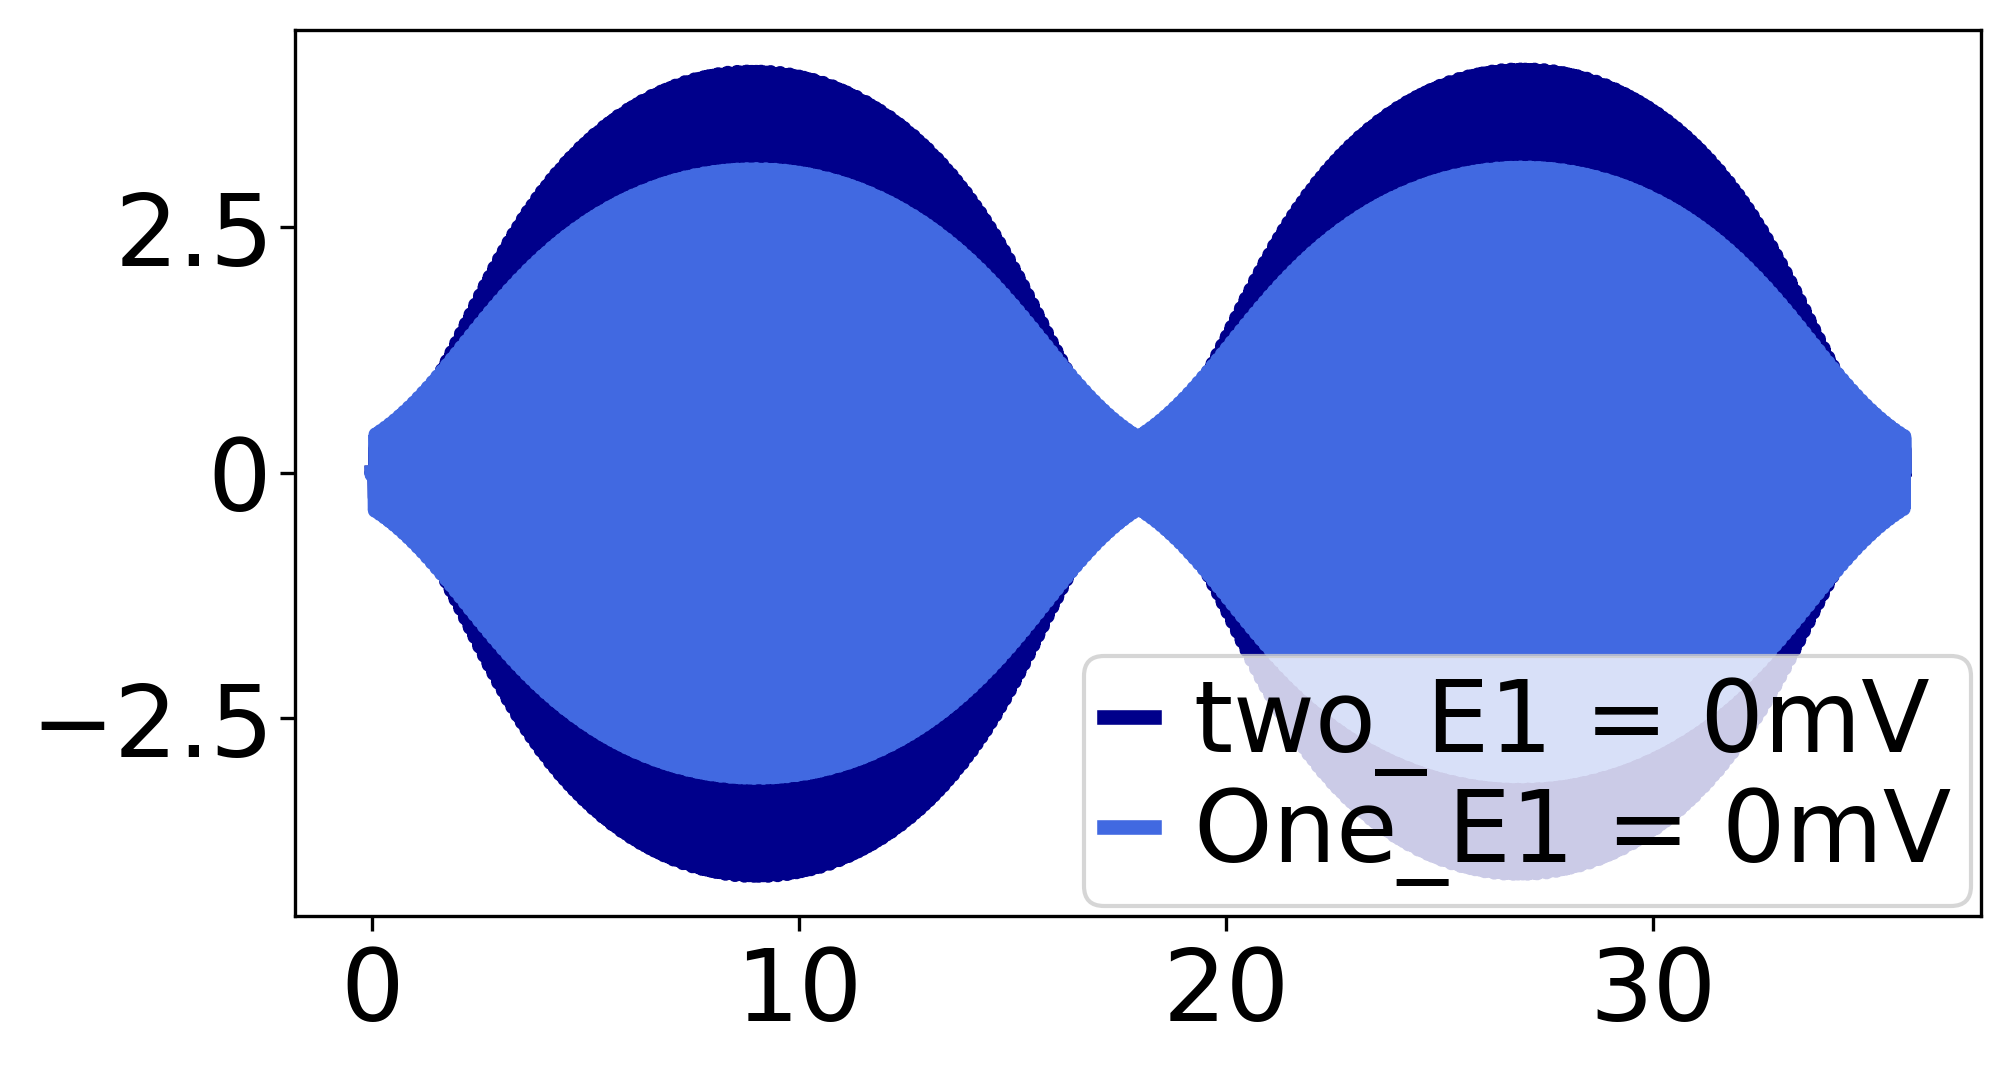

In [11]:
save_here = folder

two_step_faradaic_params =  np.asarray([[k1,  k2,
                            0.0, 0.0,
                            eta,  Zeta]
                            ])
                            
one_step_faradaic_params =  np.asarray([[k1,
                            0.0e-03,
                            eta,  Zeta]
                            ])
startPotential = 200.5E-3
revPotential = -200.5E-3

numberOfMeasurements = 31333

Hz_interval = freq*0.05# freq*0.05

# times for simulation

startT = 0.0#specify in seconds
revT =  abs((revPotential - startPotential)/(rateOfPotentialChange))#specify in seconds
endT = revT*2.0
first_half_times = np.linspace(startT, revT, numberOfMeasurements)
last_half_times = np.linspace(revT, endT, numberOfMeasurements)
times = np.hstack((first_half_times, last_half_times[1:]))


# electode potential variables for epsilon
potentialRange = np.linspace(startPotential, revPotential, numberOfMeasurements)
reversed_potentialRange = np.flip(potentialRange)
fullPotentialRange = np.hstack((potentialRange, reversed_potentialRange[1:]))

trial2 = newtonRaphsonFT(timeStepSize=times[1], inital_current=inital_current, freq=freq, startPotential= startPotential,
                        revPotential = revPotential,rateOfPotentialChange = rateOfPotentialChange, numberOfMeasurements = (numberOfMeasurements*2-1), 
                        deltaepislon=deltaepislon,uncomp_resis=uncomp_resis, electrode_area=electrode_area, electode_coverage=electode_coverage)

model2 = wrappedNewton(times = times, inital_current=inital_current, freq=freq, startPotential= startPotential,
                     revPotential = revPotential, rateOfPotentialChange = rateOfPotentialChange, deltaepislon=deltaepislon,
                    uncomp_resis=uncomp_resis, electrode_area=electrode_area, electode_coverage=electode_coverage,
                    initaldiscard = 0.0330, enddiscard = 0.885, cap_params=cap_params)

# single step model

trial1 = oneStepModel(timeStepSize=times[1], inital_current=inital_current, freq=freq, startPotential= startPotential,
                        revPotential = revPotential,rateOfPotentialChange = rateOfPotentialChange, numberOfMeasurements = (numberOfMeasurements*2-1), 
                        deltaepislon=deltaepislon,uncomp_resis=uncomp_resis, electrode_area=electrode_area, electode_coverage=electode_coverage)

model1 = wrappedOneStepModel(times = times, inital_current=inital_current, freq=freq, startPotential= startPotential,
                     revPotential = revPotential, rateOfPotentialChange = rateOfPotentialChange, deltaepislon=deltaepislon,
                    uncomp_resis=uncomp_resis, electrode_area=electrode_area, electode_coverage=electode_coverage,
                    initaldiscard = 0.01, enddiscard = 0.885, cap_params=cap_params)

output = np.vstack((times, fullPotentialRange))
headers = ['time/s', 'potential/V']

for index in range(1):

    solution1 = model1.simulate(one_step_faradaic_params[index][:], times)
    solution2 = model2.simulate(two_step_faradaic_params[index][:], times)

    # plt.figure()
    # plt.title("simulated AC current")
    # plt.ylabel("current/A")
    # plt.xlabel('E/V')
    colour = ['royalblue', 'darkblue', 'darkred', 'coral']
    label1 = ['One_E1 = 0mV', 'E1 = -25mV', 'E1 = -100mV', 'E1 = -300mV']
    label2 = ['two_E1 = 0mV', 'E1 = -25mV', 'E1 = -100mV', 'E1 = -300mV']
    output = np.vstack((output, (10**6)*solution2*trial2.I0))
    headers.append(label2[index])
    plt.plot(times, (10**6)*solution2*trial2.I0, str(colour[index+1]), label=str(label2[index]))
    output = np.vstack((output, (10**6)*solution1*trial1.I0))
    headers.append(label1[index])
    plt.plot(times, (10**6)*solution1*trial1.I0, str(colour[index]), label=str(label1[index]))
    # f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
    # g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    # plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
    # plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
    # plt.show()
    # plt.close()

f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(g))
plt.legend(loc='best', markerscale = 0.1, labelspacing = 0.1, handlelength = 0.5, columnspacing = 0.1, borderaxespad = 0.1, handletextpad = 0.4, borderpad = 0.2)
plt.savefig(os.path.join(save_here,'one_vs_two_current_trace.png'),transparent=True, bbox_inches='tight')
plt.show()
plt.close()

output = np.transpose(output)
pd.DataFrame(output).to_csv(os.path.join(save_here,'one_vs_two_current_trace.txt'), header=headers, index=None, sep='\t')
del(output)